# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


-------------------------------------------------------------------------------------------------------
# 1- Análisis exploratorio inicial

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set()
import statistics as stat
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20
pd.set_option('display.max_columns', None)

In [2]:
# Cargamos el dataset
df_weather = pd.read_csv("./data/weatherAUS.csv")

In [4]:
# Visualizamos primeras filas
df_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
# Hacemos un resumen del dataset
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df_weather.shape

(145460, 23)

In [7]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Comenazamos analizando las variables de entrada y salida. 

Variables de entrada: Todas las columnas excepto por la última "RainTomorrow".

Variables de salida: "RainTomorrow". Como el objetivo es predecir si mañana llueve o no, es un problema de clasifcación binaria.


Nota: Algunas de las variables de entrada, se refieren a distintas horas del día. Entonces, tendría que tener en cuenta en que momento del día se ejecutaría el modelo de predicción para considerar si esas variables van a estar disponibles o no. En principio supondremos que todas las variables están disponibles al momento de la predicción.

## Analisis de columnas

##### Columna Date

In [8]:
df_weather['Date'].describe()

count         145460
unique          3436
top       2014-08-10
freq              49
Name: Date, dtype: object

La columna Date es una variable del tipo Fecha. Notamos que existen 3436 valores únicos en los 145460 registros. Por lo que o existen valores faltantes, o existen fechas repetidas.

In [9]:
# Cantidad de null en fecha
print(df_weather['Date'].isnull().sum())
print(df_weather.groupby(['Date']).count().shape)
print(df_weather.groupby(['Date','Location']).count().shape)

0
(3436, 22)
(145460, 21)


Observamos que las fechas estan repetidas para diferentes ciudades. Por lo que ambas columnas deberan ser incluidas para poder tener registros únicos.

En el caso de la fecha, se cree que tiene importancia ya que hay meses donde la lluvia es mas abundante que en otros meses. Sin embargo, no se cree relevante toda la fecha en sí, sino que se cree sería conveniente convertir la fecha únicamente al mes. Corroboramos realizando el ploteo de la salida (Rain Tomorrow) en fución de la fecha en diferentes granularidades para una sola localidad.

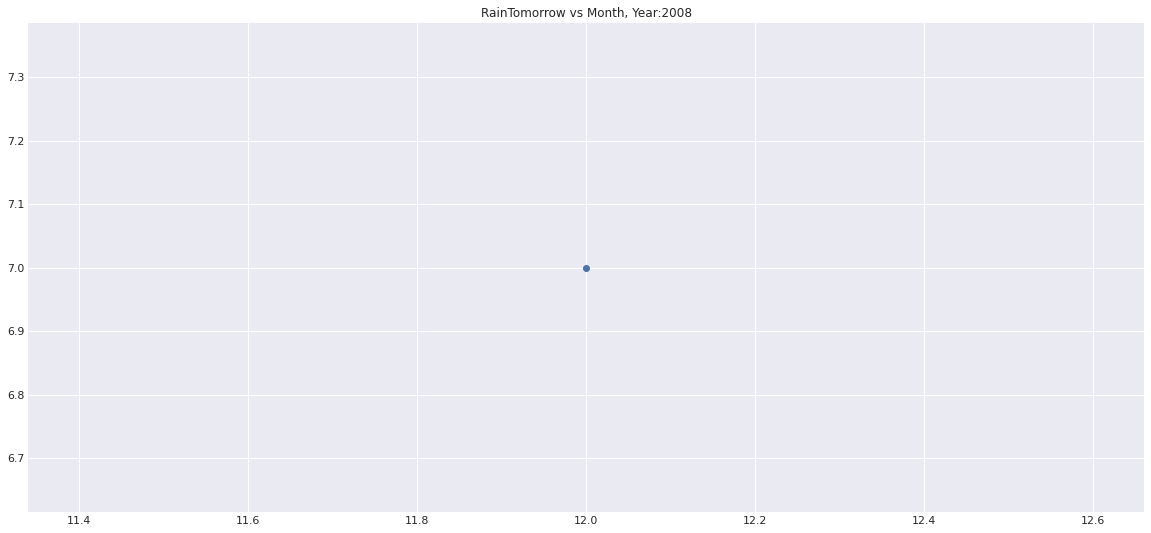

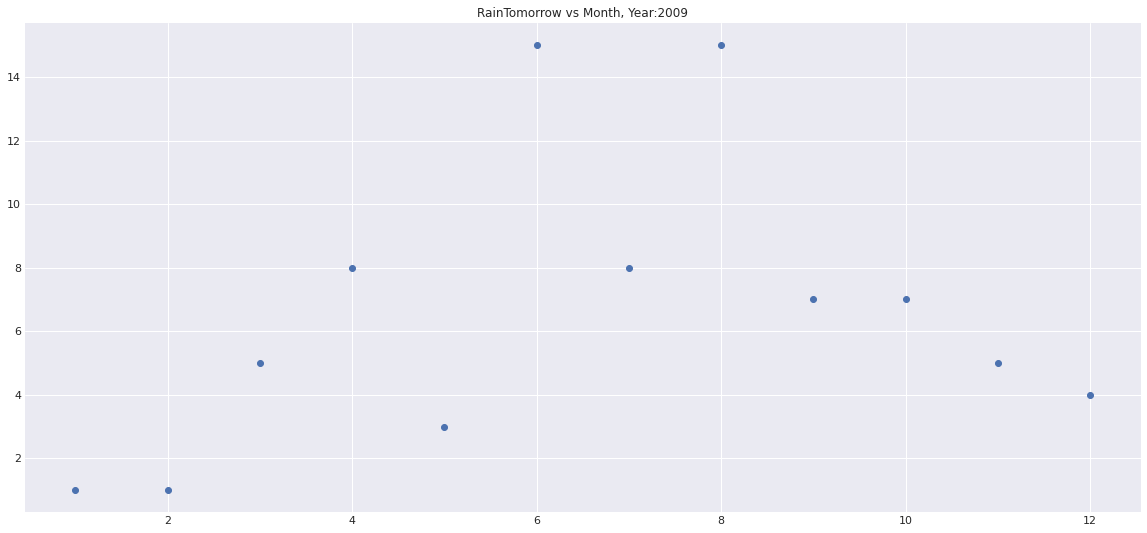

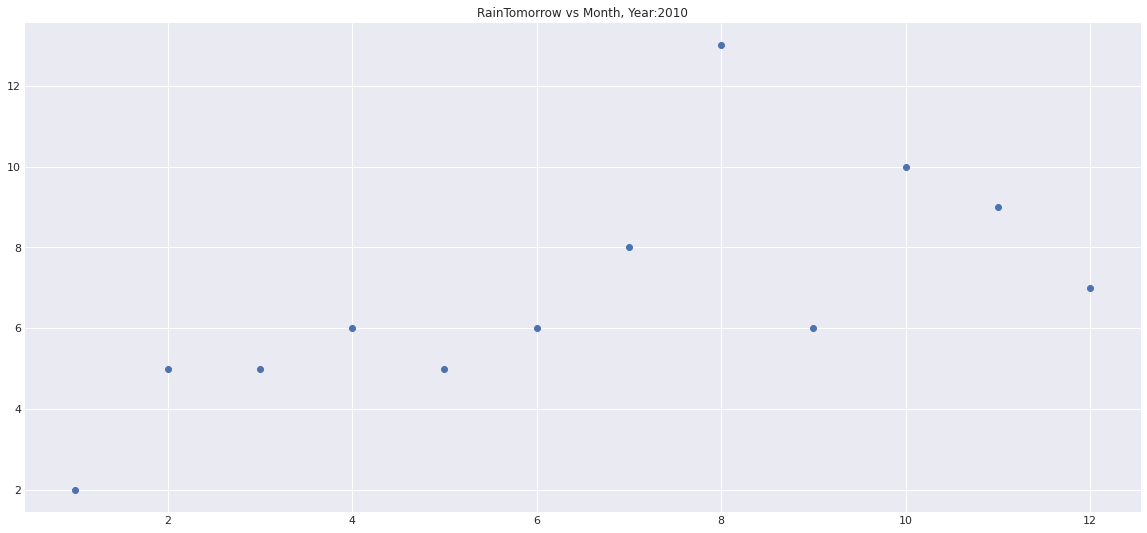

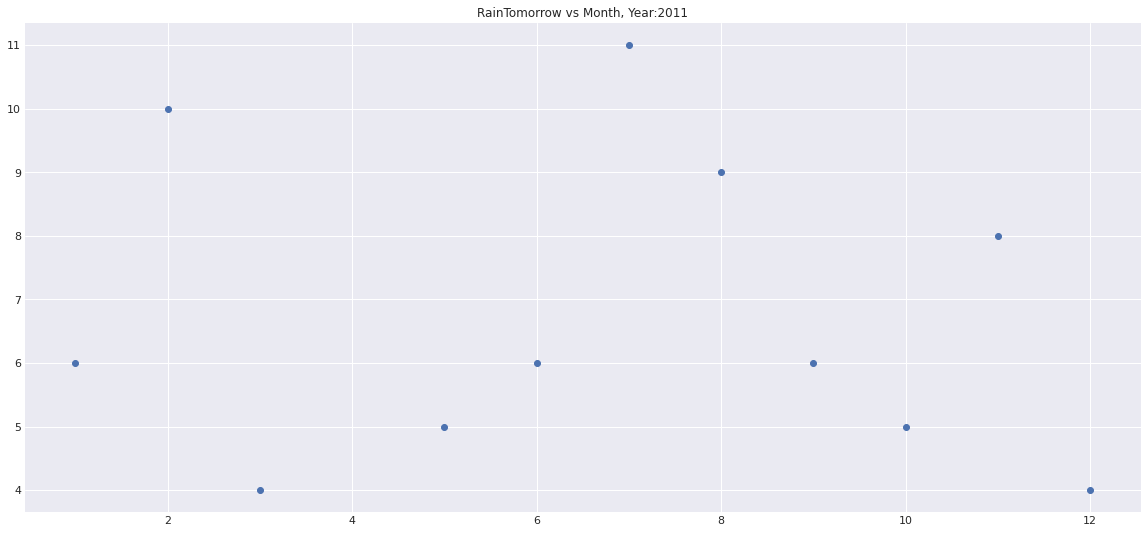

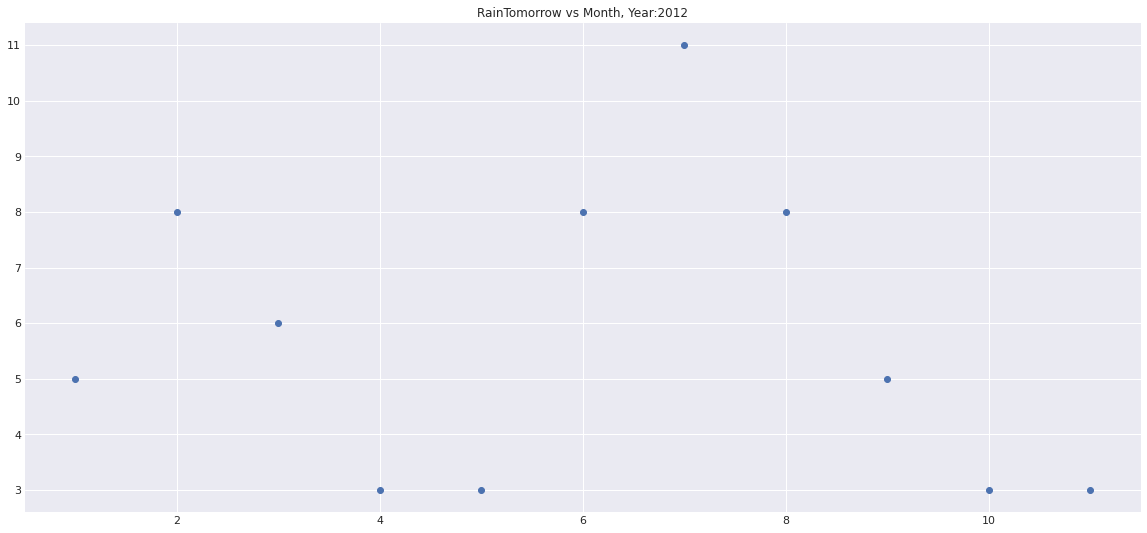

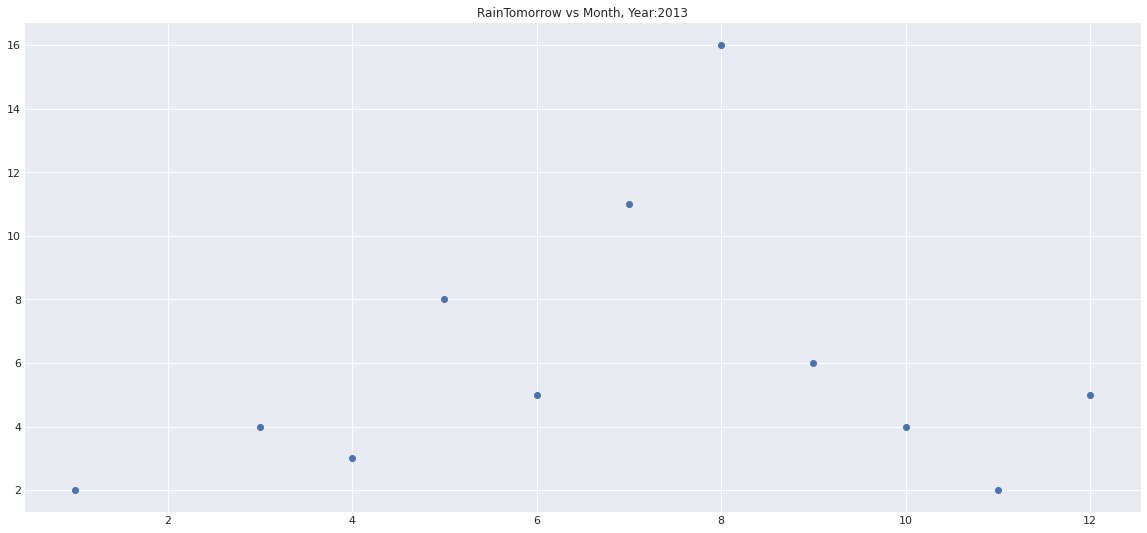

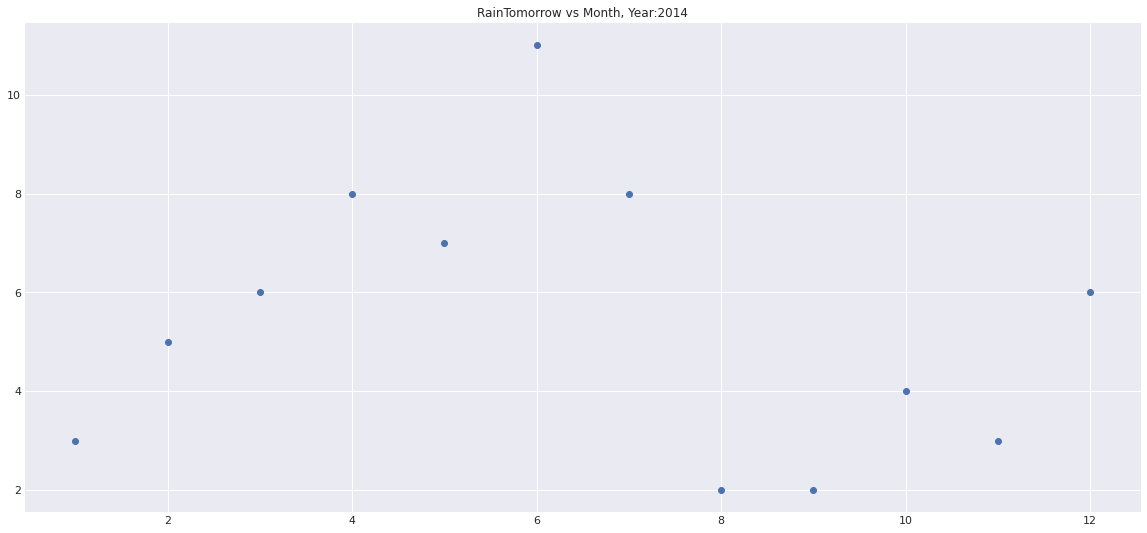

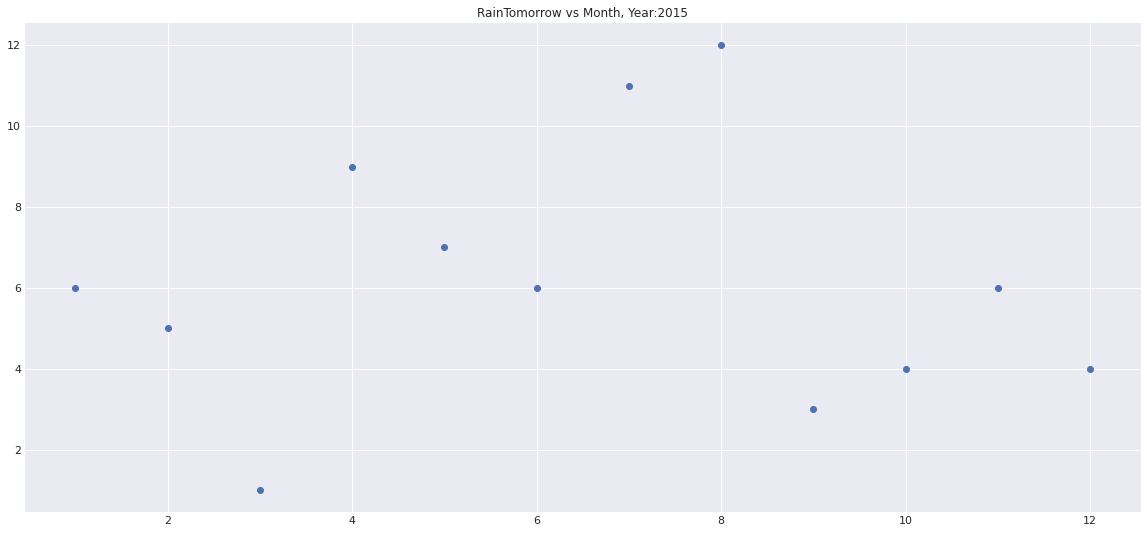

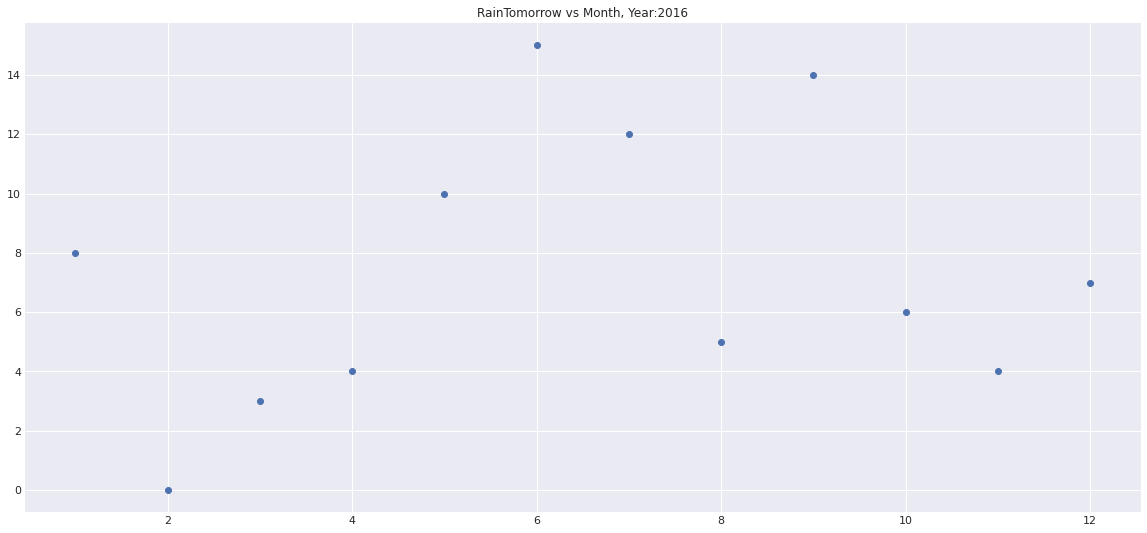

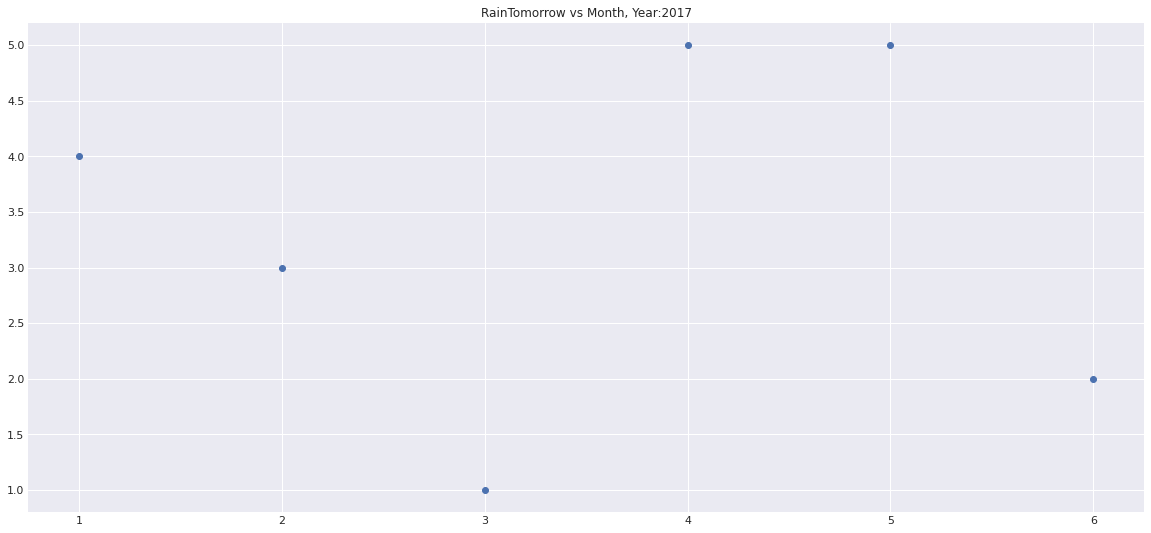

In [10]:
# Aplico granularidad de meses
df_aux = df_weather[['Date','RainTomorrow']][df_weather['Location']=='Albury']
df_aux['Year']=df_weather[df_weather['Location']=='Albury']['Date'].astype(str).str[0:4]
df_aux['Month']=df_weather[df_weather['Location']=='Albury']['Date'].astype(str).str[5:7]
df_aux['RainTomorrow']=df_aux['RainTomorrow']=='Yes'
for years in df_aux['Year'].unique():
    x_axis = np.array(df_aux['Month'][df_aux['Year']==years].unique(),dtype='int')
    y_axis=np.array(df_aux[df_aux['Year']==years].groupby('Month')['RainTomorrow'].sum())
    plt.figure()
    plt.scatter(x_axis,y_axis)
    plt.title('RainTomorrow vs Month, Year:' + years)
    plt.show()

En las gráficas anteriores, pareciera que existe una pequeña relación entre los meses del año y la "probabilidad" de lluvia. 

Entonces, de la fecha mantendremos únicamente el mes. Podemos realizar varias codificaciones del mes, como primer aporximación mantendremos su valor numérico. En el caso del año, la problemática que tenemos es que si ponemos los modelos a ejecutarse con datos nuevos, el año siempre tendrá valores no utilizados en el entrenamiento.

#### Columna Location

In [11]:
df_weather['Location'].describe()

count       145460
unique          49
top       Canberra
freq          3436
Name: Location, dtype: object

In [12]:
df_weather.groupby('Location')['Location'].count()

Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville      

La columna Location es del tipo Categorica Nominal con una cardinalidad elevada. También vemos que prácticamente todas las ciudades estan representadas, por lo que no podemos aplicar técnicas de codificación de etiquetas poco frecuentes.

Analizamos si es de interes para la salida

In [13]:
def myplot_categorical(series):
    categorical_series=df_weather[df_weather['RainTomorrow']=='Yes'].groupby(series)['RainTomorrow'].\
                            count() / df_weather.groupby(series)['RainTomorrow'].count()
    categorical_series=categorical_series.sort_values()

    fig, ax = plt.subplots()
    plt.xticks(range(0,categorical_series.index.shape[0]), categorical_series.index, rotation=90)
    ax.bar(range(0,categorical_series.index.shape[0]), categorical_series, color='blue')
    plt.title('Porcentaje de dias lluviosos (2008-2017)')
    ax.set_ylabel('Dias')
    ax.set_xlabel(series)
    plt.show()

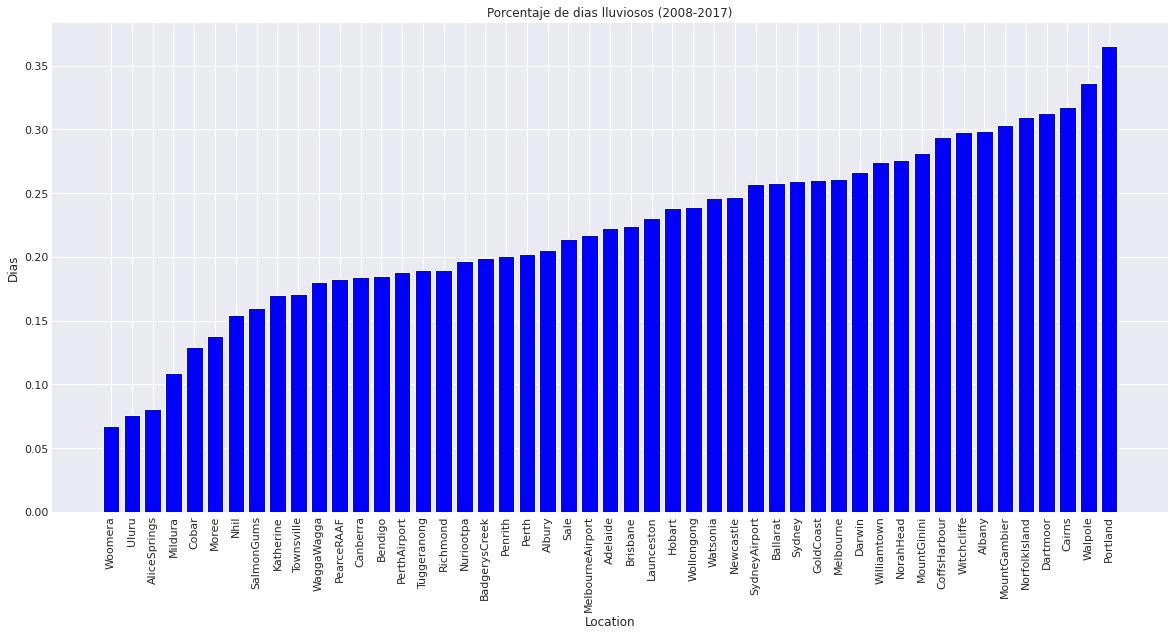

In [14]:
myplot_categorical('Location')

Notamos que existe una relación entre la ciudad y la probabilidad que llueva. Se concluye que es necesario incluir esta variable.

En cuanto a como considerarla, aplicar one hot encoding en este caso no sería recomendable por la alta cardinalidad. Se considera que es mas apropiado aplicar ordinal encoding con orden o peso de evidencia.


#### Columna MinTemp

In [15]:
df_weather['MinTemp'].describe()

count    143975.000000
mean         12.194034
std           6.398495
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.900000
max          33.900000
Name: MinTemp, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos y negativos. 
Graficamos distribución (sin contar Na)

In [16]:
def myplot_statistics(series):
    numerical_series=df_weather[series][-df_weather[series].isnull()]
    fig,axes = plt.subplots()
    sns.distplot(numerical_series, bins=20).set_title('Values distribution')   
    plt.axvline(np.mean(numerical_series),color='red',label='Mean')
    plt.axvline(np.median(numerical_series),color='green',label='Median')
    plt.axvline(stat.mode(numerical_series),color='orange',label='Mode')
    plt.legend()

    fig,axes = plt.subplots()
    sns.boxplot(y=numerical_series)
    axes.set_title('Box&Whiskers')
    
    # Chequeamos outliers
    q25, q75 = np.percentile(numerical_series, 25), np.percentile(numerical_series, 75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower,upper = q25-cutoff, q75+cutoff
    print("Lower bound: {}".format(lower))
    print("Upper bound: {}".format(upper))
    print("Outliers: {}".format(np.sum(numerical_series<lower)+np.sum(numerical_series>upper)))
    print("% Outliers: {}".format((np.sum(numerical_series<lower)+np.sum(numerical_series>upper))*100 / \
                                  numerical_series.shape[0]))

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -6.35
Upper bound: 30.849999999999998
Outliers: 54
% Outliers: 0.0375065115471436


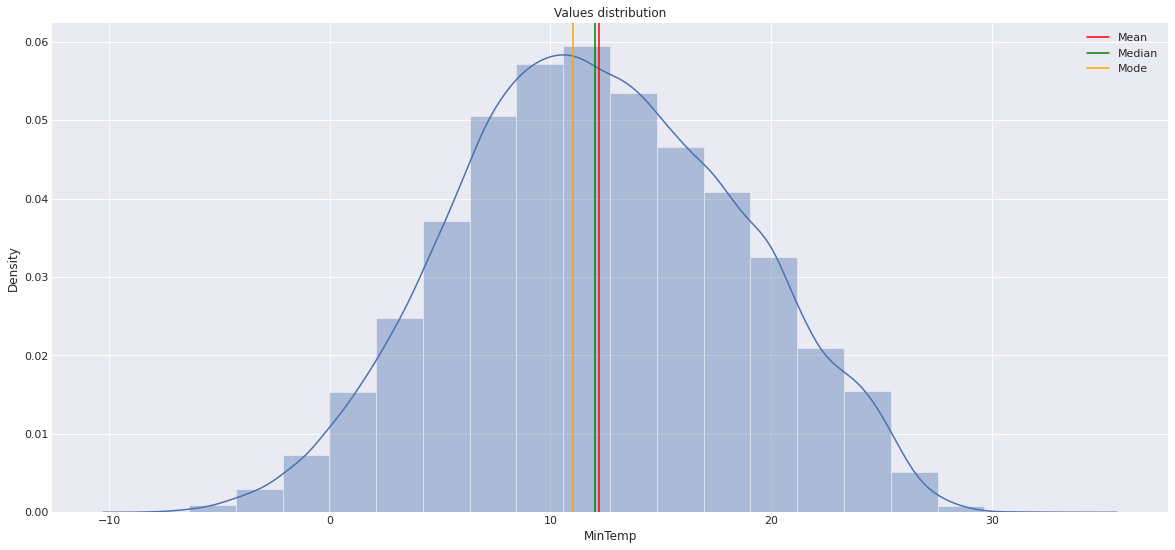

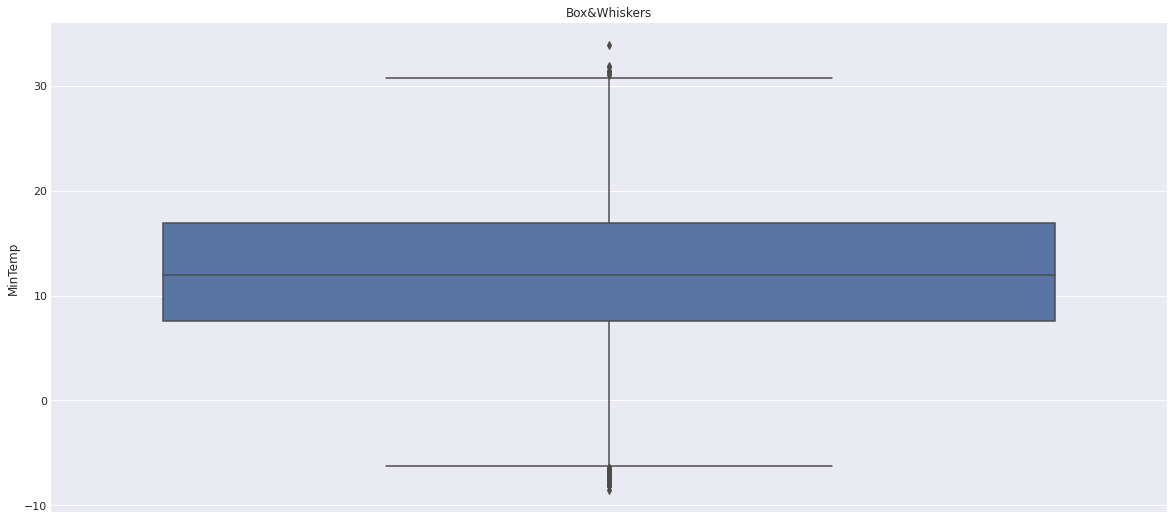

In [17]:
myplot_statistics('MinTemp')

Observamos que tiene una distribución muy cercana a una gaussiana, con una pequeña oblicuidad hacia la derecha. Se observan pocos outliers. 

#### Columna MaxTemp

In [18]:
df_weather['MaxTemp'].describe()

count    144199.000000
mean         23.221348
std           7.119049
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos y negativos. 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 2.4499999999999975
Upper bound: 43.65
Outliers: 489
% Outliers: 0.3391146956636315


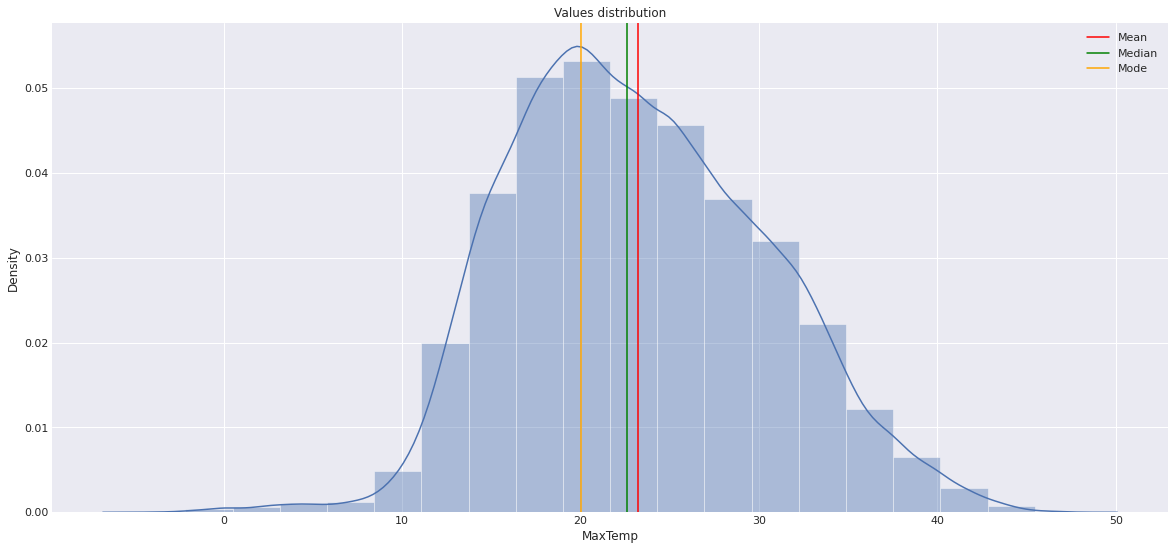

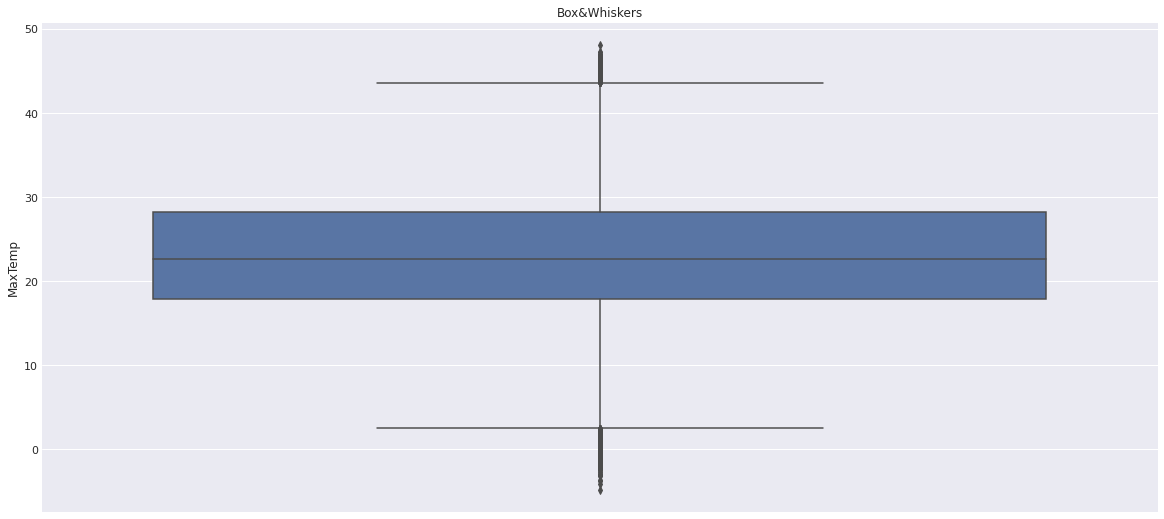

In [19]:
myplot_statistics('MaxTemp')

En este caso la distribución es mas irregular, con mayor oblicuidad hacia la derecha. Se observa poca cantidad de outliers. 

#### Columna Rainfall

In [20]:
df_weather['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con una distribución inusual 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -1.2000000000000002
Upper bound: 2.0
Outliers: 25578
% Outliers: 17.98746826630286


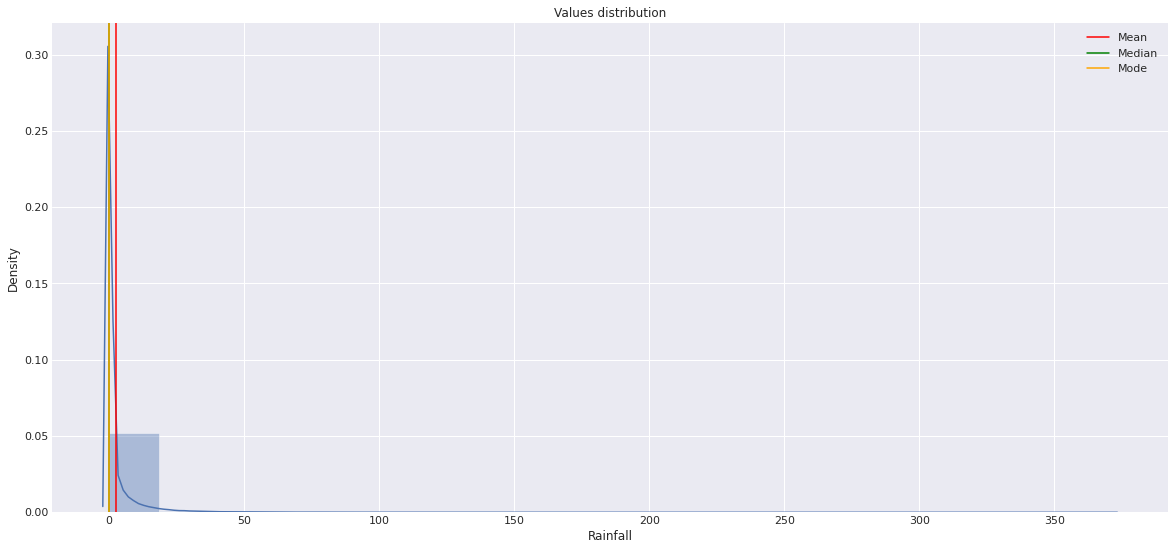

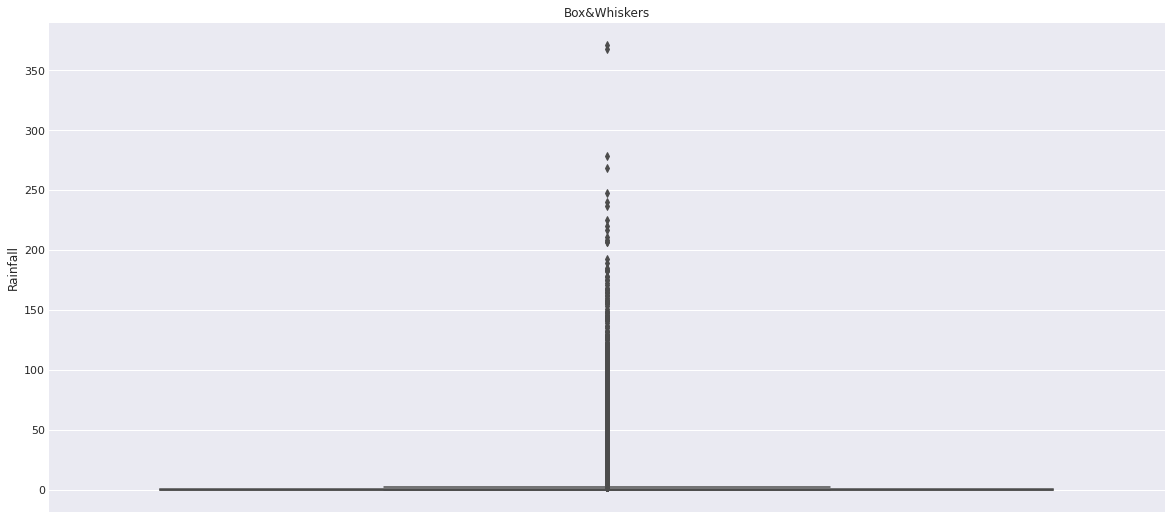

In [21]:
myplot_statistics('Rainfall')

En este caso la distribución es extremadamente irregular. Con mucha variacion entre valores. Podría ser beneficioso aplicar una transformación

#### Evaporation

In [22]:
df_weather['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

Es una variable del tipo numérica, punto flotante en específico, con valores positivos. 
Graficamos distribución (sin contar Na)

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -4.600000000000001
Upper bound: 14.600000000000001
Outliers: 1995
% Outliers: 2.4132091447925488


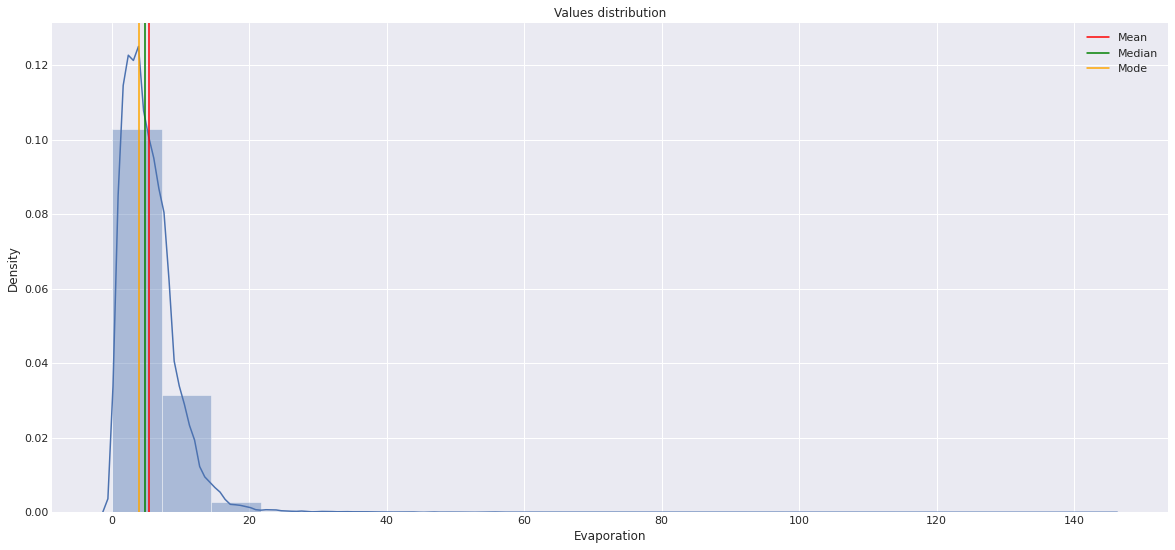

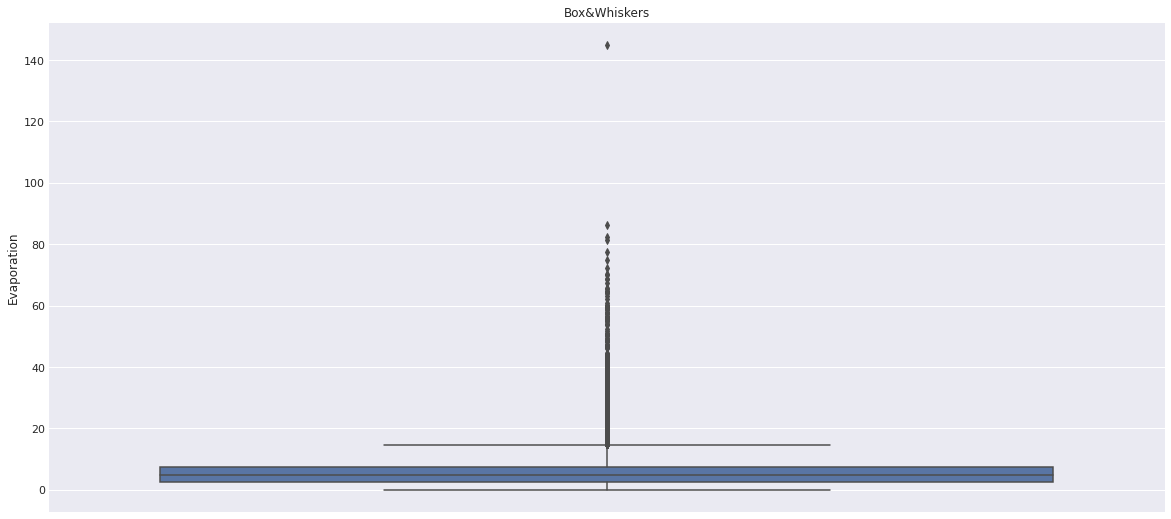

In [23]:
myplot_statistics('Evaporation')

Nuevamente la distribución tiene una forma irregular. Podríamos aplicar transformación.

#### Sunshine

In [24]:
df_weather['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

Sunshine es una variable del tipo punto flotante. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -3.8999999999999995
Upper bound: 19.299999999999997
Outliers: 0
% Outliers: 0.0


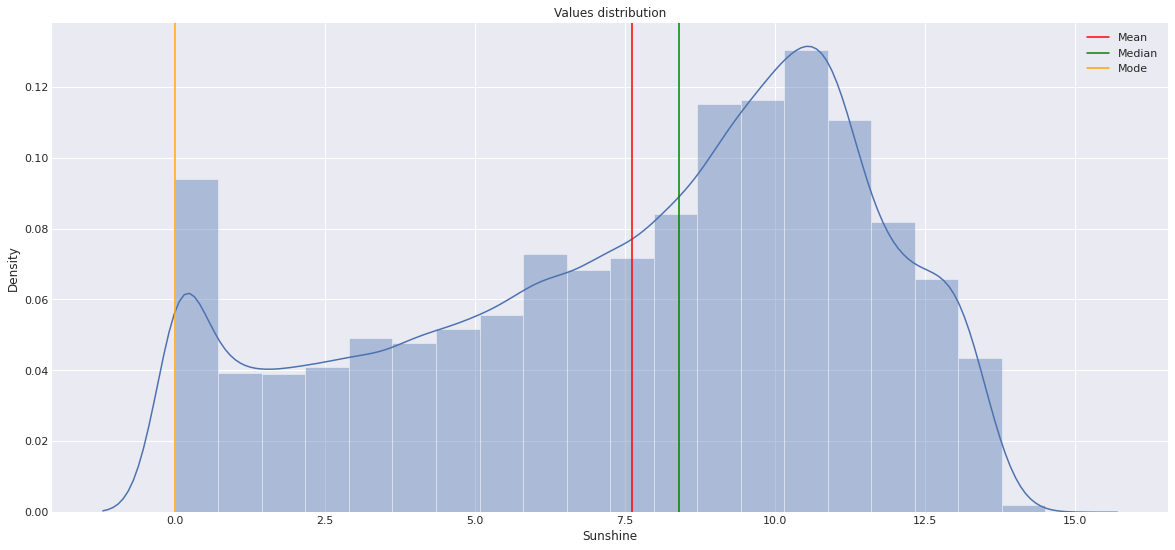

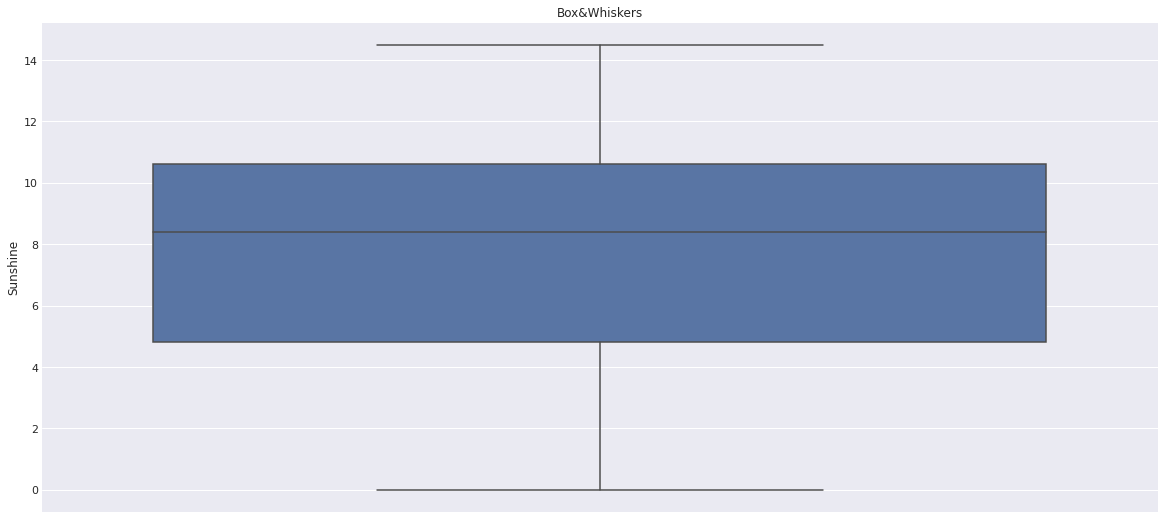

In [25]:
myplot_statistics('Sunshine')

#### WindGustDir | WindDir9am | WindDir3pm

In [26]:
print(df_weather['WindGustDir'].describe())
print(df_weather['WindDir9am'].describe())
print(df_weather['WindDir3pm'].describe())

count     135134
unique        16
top            W
freq        9915
Name: WindGustDir, dtype: object
count     134894
unique        16
top            N
freq       11758
Name: WindDir9am, dtype: object
count     141232
unique        16
top           SE
freq       10838
Name: WindDir3pm, dtype: object


In [27]:
print(df_weather.groupby('WindGustDir')['WindGustDir'].count())
print(df_weather.groupby('WindDir9am')['WindDir9am'].count())
print(df_weather.groupby('WindDir3pm')['WindDir3pm'].count())

WindGustDir
E      9181
ENE    8104
ESE    7372
N      9313
NE     7133
NNE    6548
NNW    6620
NW     8122
S      9168
SE     9418
SSE    9216
SSW    8736
SW     8967
W      9915
WNW    8252
WSW    9069
Name: WindGustDir, dtype: int64
WindDir9am
E       9176
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
WindDir3pm
E       8472
ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
Name: WindDir3pm, dtype: int64


Las variables WindDir son del tipo categóricas nominales. Observamos que tiene una cardinalidad de 16 valores diferentes, y todos los valores estan representados. 
La podemos codificar con one-hot encoding, o bien con integer encoding dividiendo los 360° de direccion en cuadrantes sucesivos.

Graficamos su relación respecto a la salida para verificar.

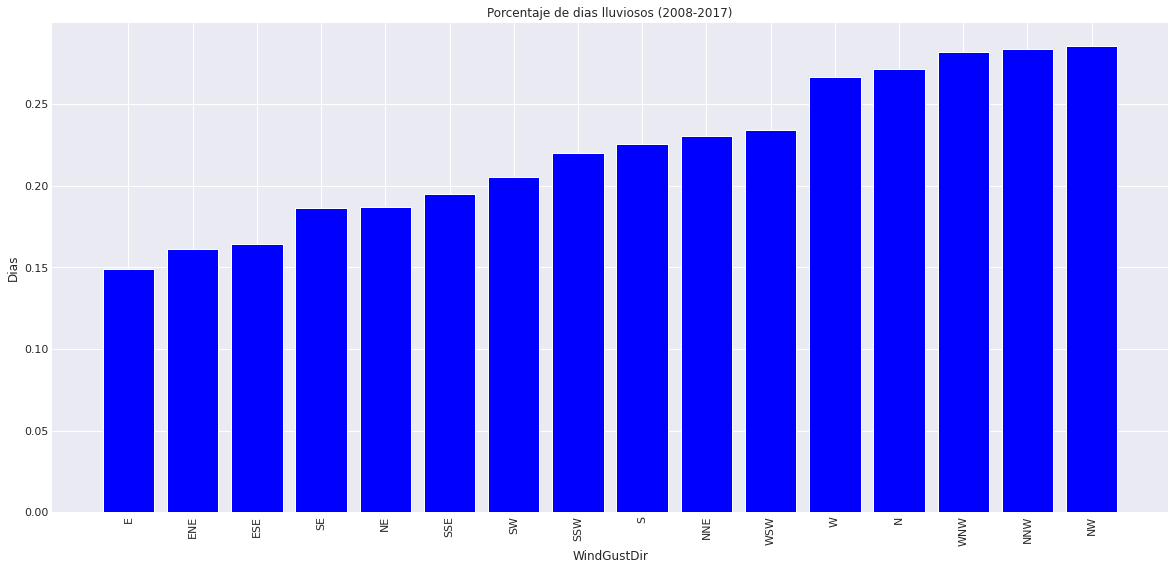

In [28]:
myplot_categorical('WindGustDir')

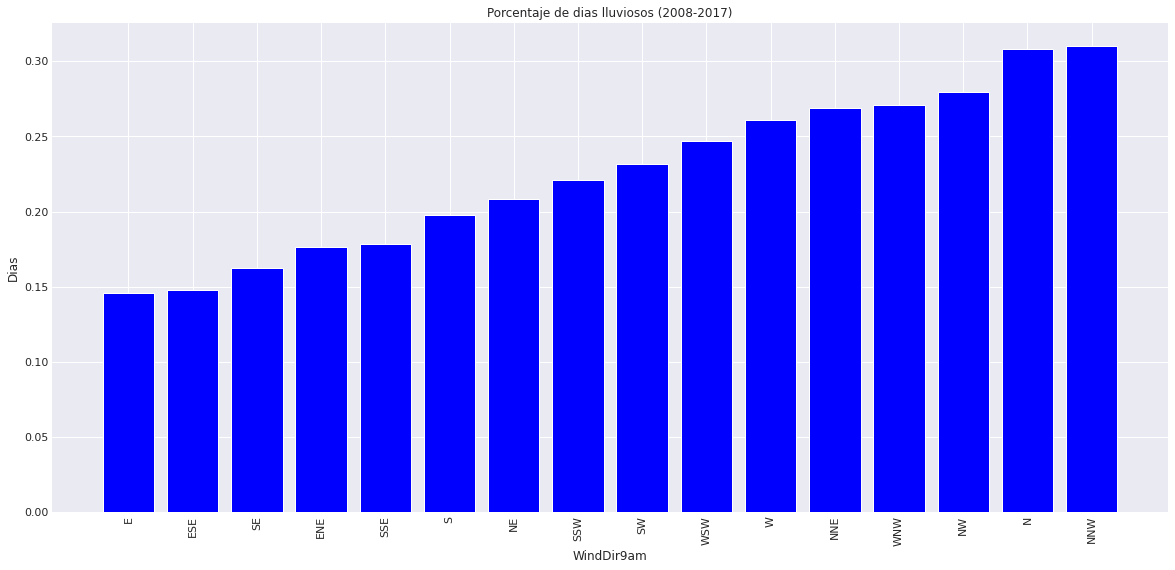

In [29]:
myplot_categorical('WindDir9am')

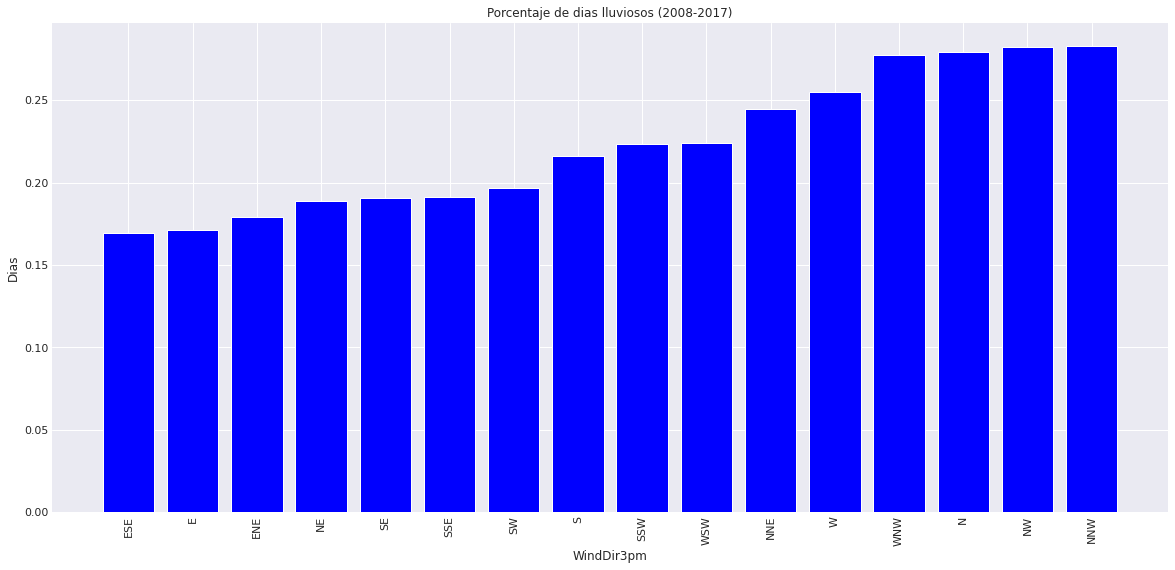

In [30]:
myplot_categorical('WindDir3pm')

#### WindGustSpeed | WindSpeed9am | WindSpeed3pm 

In [31]:
print(df_weather['WindGustSpeed'].describe())
print(df_weather['WindSpeed9am'].describe())
print(df_weather['WindSpeed3pm'].describe())

count    135197.000000
mean         40.035230
std          13.607062
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64
count    143693.000000
mean         14.043426
std           8.915375
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64
count    142398.000000
mean         18.662657
std           8.809800
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64


Es una variable del tipo numérica. Verificamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 5.5
Upper bound: 73.5
Outliers: 3092
% Outliers: 2.2870329962942963


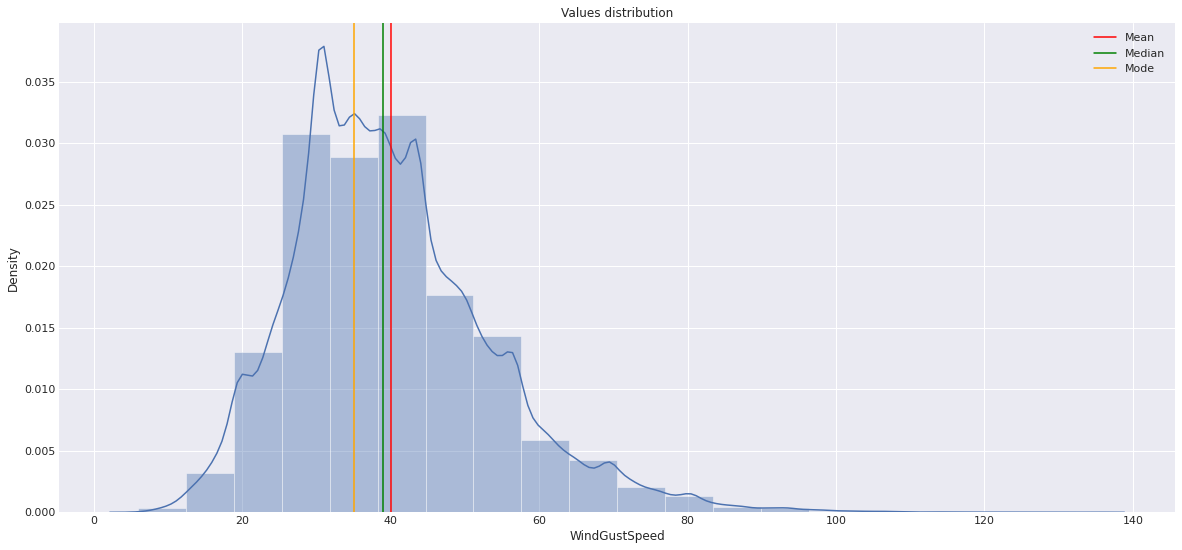

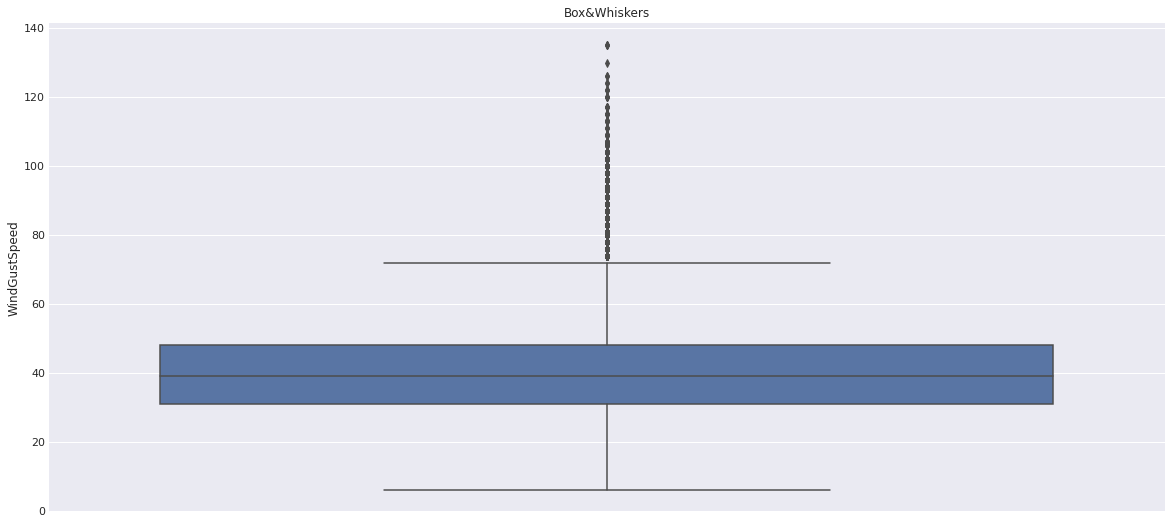

In [32]:
myplot_statistics('WindGustSpeed')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -11.0
Upper bound: 37.0
Outliers: 1817
% Outliers: 1.264501402295171


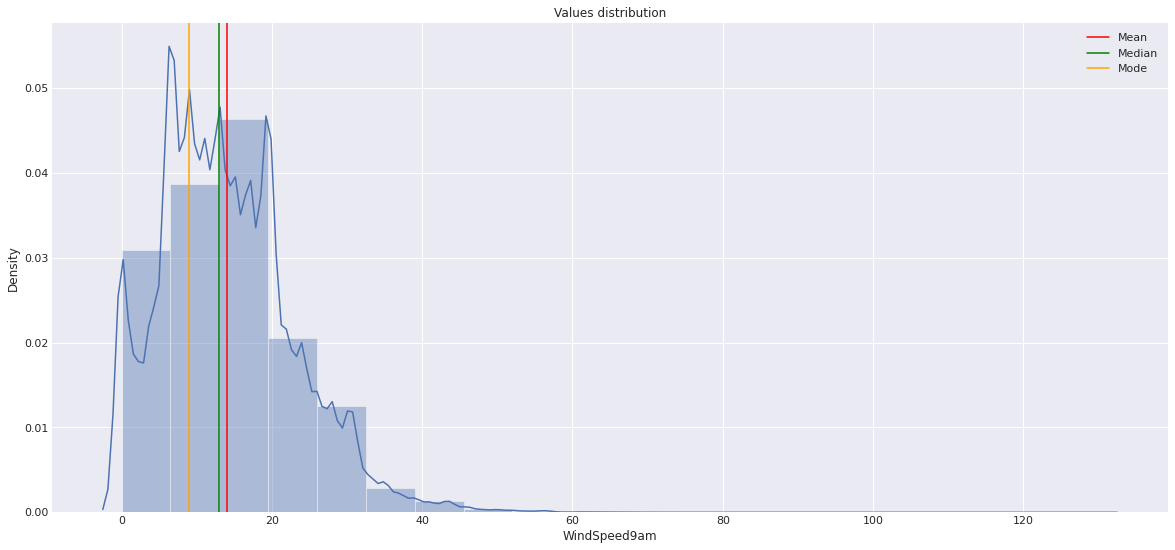

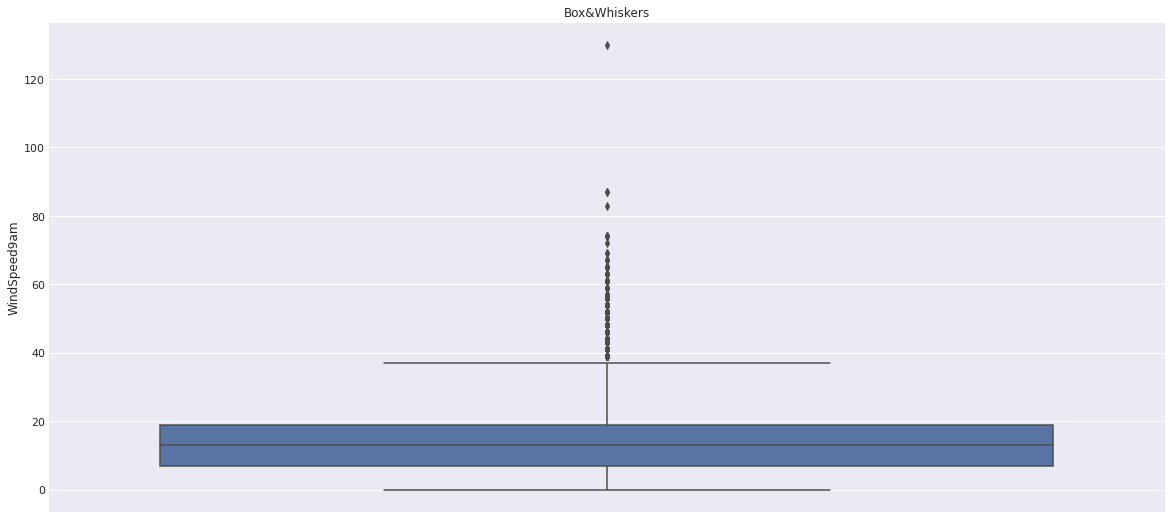

In [33]:
myplot_statistics('WindSpeed9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -3.5
Upper bound: 40.5
Outliers: 2523
% Outliers: 1.7717945476762313


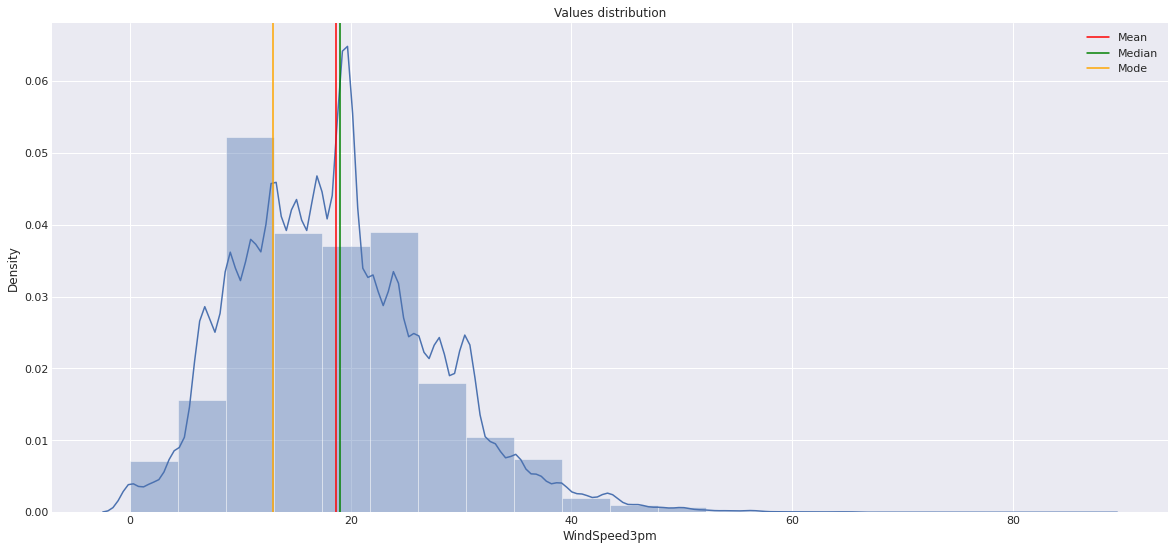

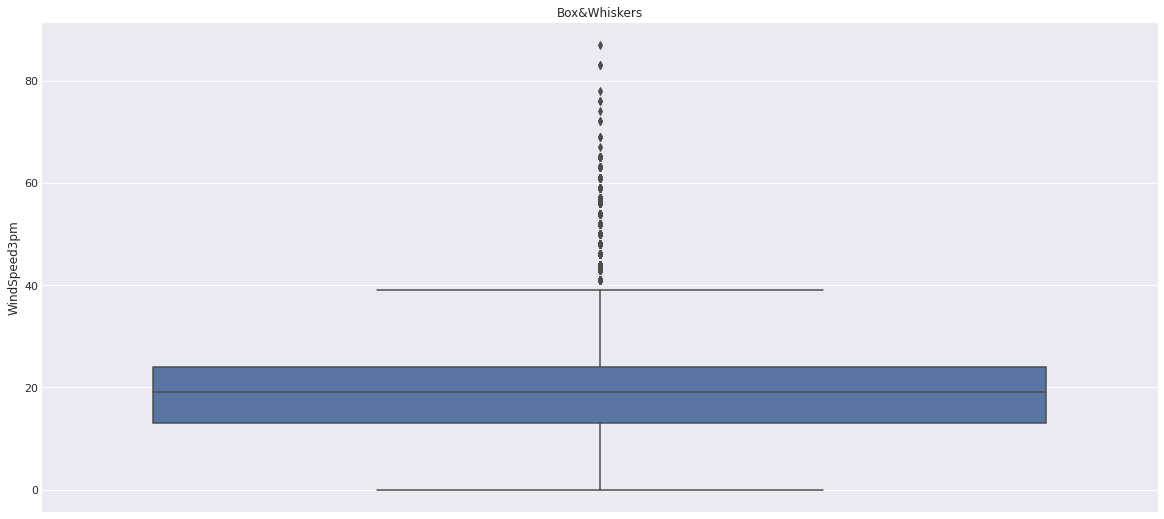

In [34]:
myplot_statistics('WindSpeed3pm')

 Las distribuciones son irregulares pero con una tendencia a ser gaussianas.

#### Humidity9am | Humidity3pm

In [35]:
print(df_weather['Humidity9am'].describe())
print(df_weather['Humidity3pm'].describe())

count    142806.000000
mean         68.880831
std          19.029164
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64
count    140953.000000
mean         51.539116
std          20.795902
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64


Las humedades son del tipo numérica de punto flotante. Verificamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 18.0
Upper bound: 122.0
Outliers: 1425
% Outliers: 0.9978572328893744


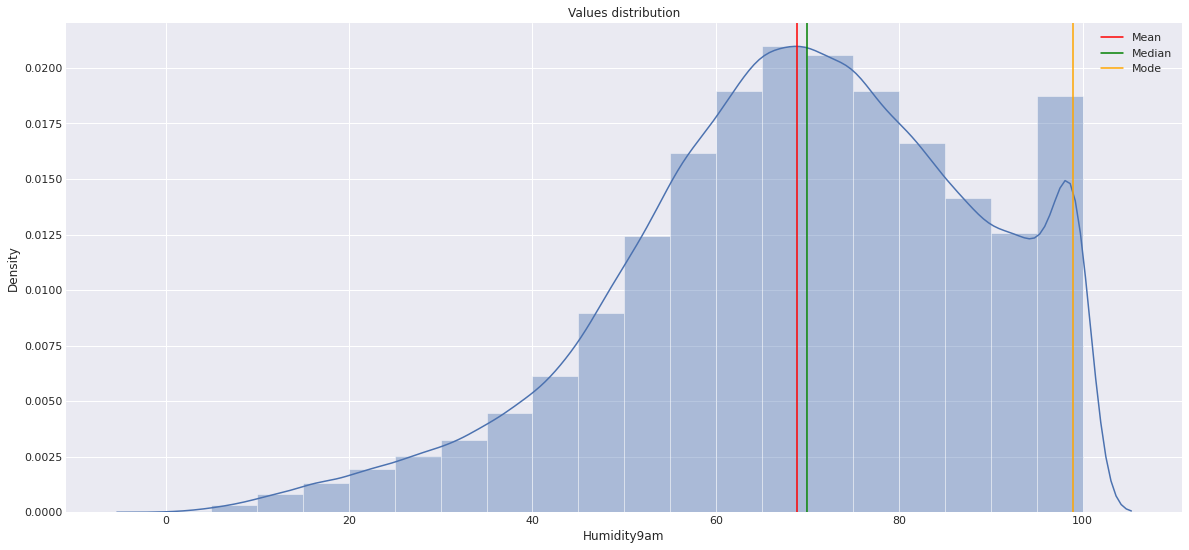

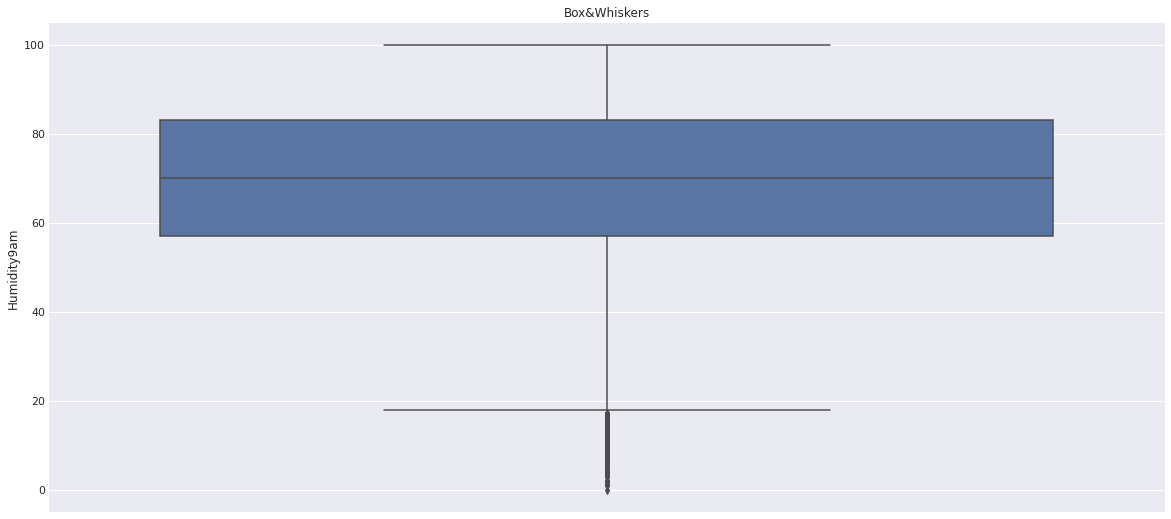

In [36]:
myplot_statistics('Humidity9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -6.5
Upper bound: 109.5
Outliers: 0
% Outliers: 0.0


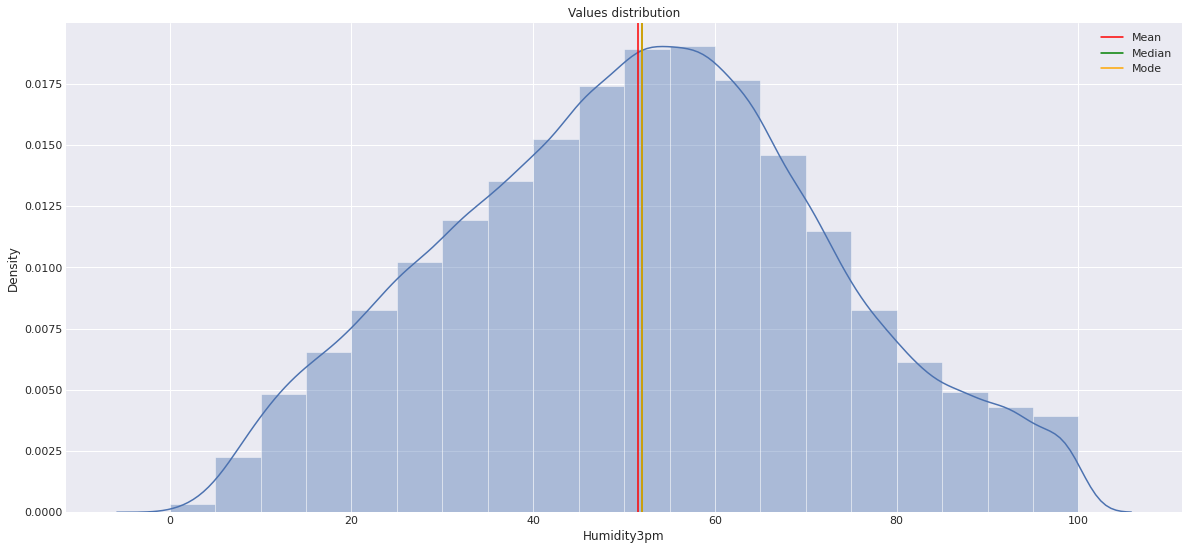

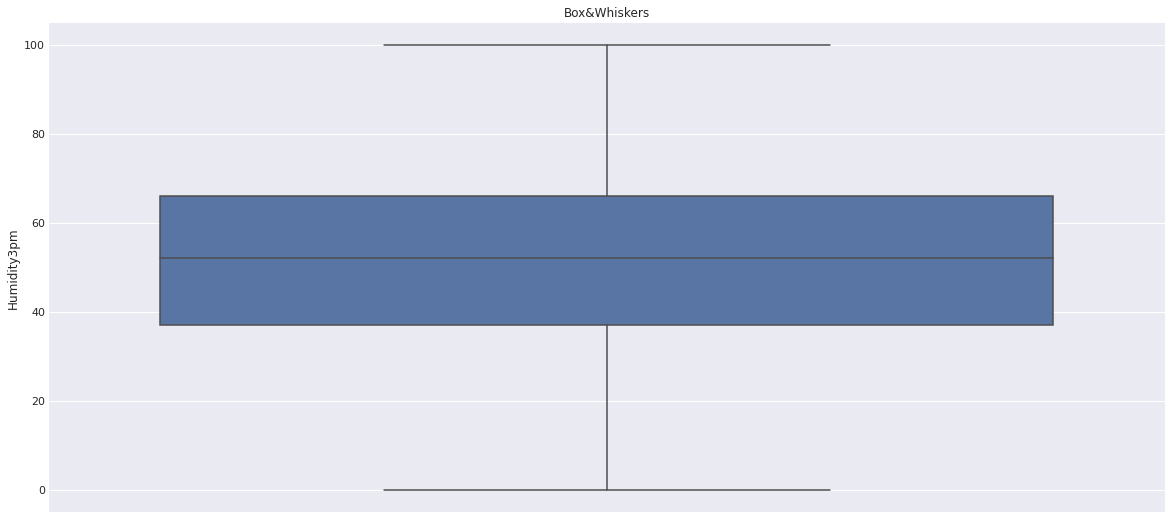

In [37]:
myplot_statistics('Humidity3pm')

Observamos distribuciones bastante regulares (excepto por la presencia de gran cantidad de picos de alta humedad a las 9am) y con poca presencia de outliers.

#### Pressure9am | Pressure3pm

In [38]:
print(df_weather['Pressure9am'].describe())
print(df_weather['Pressure3pm'].describe())

count    130395.00000
mean       1017.64994
std           7.10653
min         980.50000
25%        1012.90000
50%        1017.60000
75%        1022.40000
max        1041.00000
Name: Pressure9am, dtype: float64
count    130432.000000
mean       1015.255889
std           7.037414
min         977.100000
25%        1010.400000
50%        1015.200000
75%        1020.000000
max        1039.600000
Name: Pressure3pm, dtype: float64


Las presiones son variables de tipo numéricas. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 998.65
Upper bound: 1036.65
Outliers: 1191
% Outliers: 0.9133785804670425


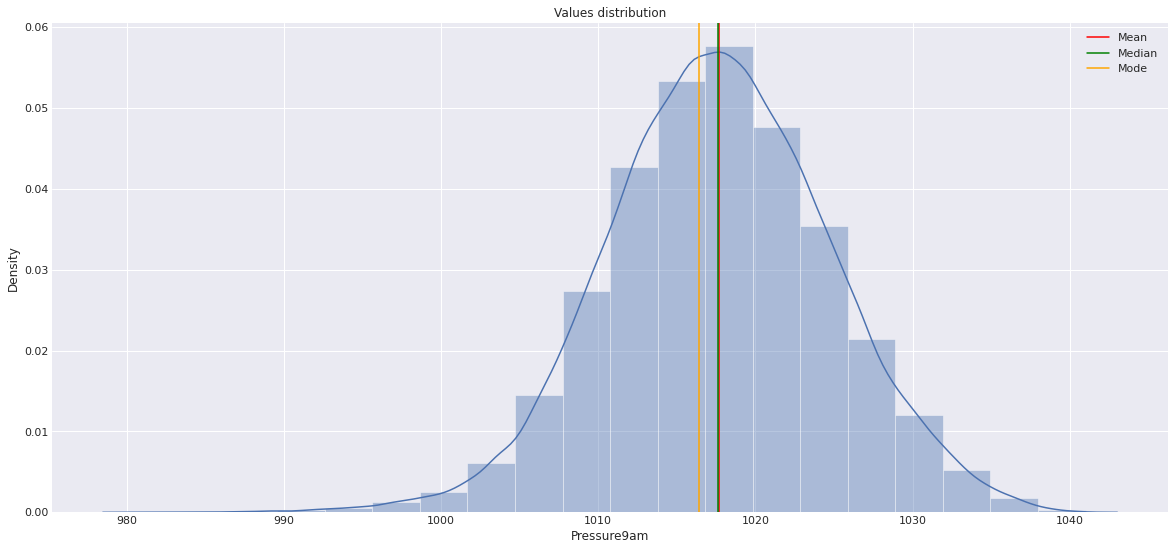

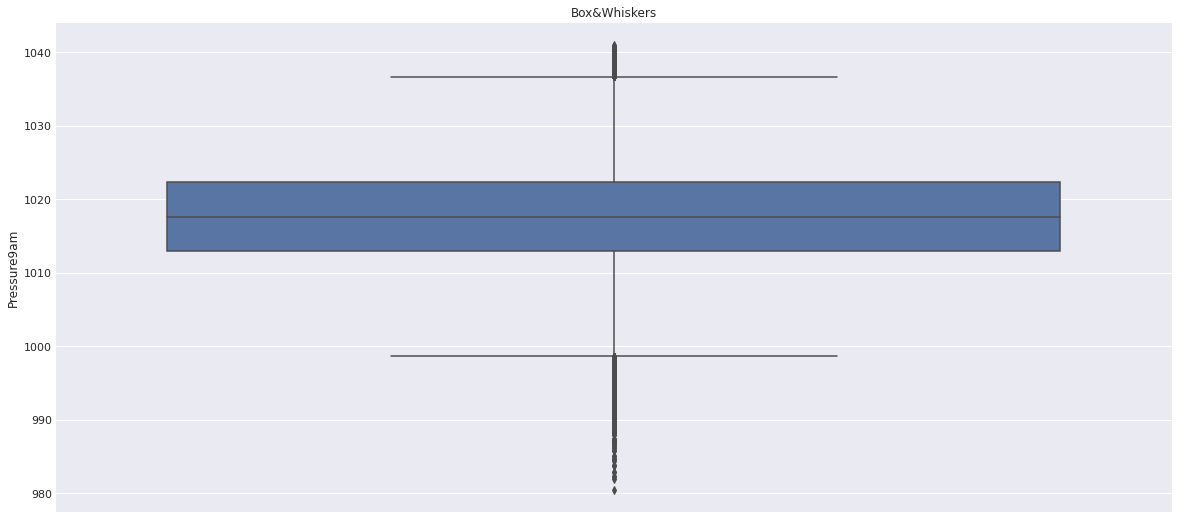

In [39]:
myplot_statistics('Pressure9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 996.0
Upper bound: 1034.4
Outliers: 919
% Outliers: 0.7045816977428851


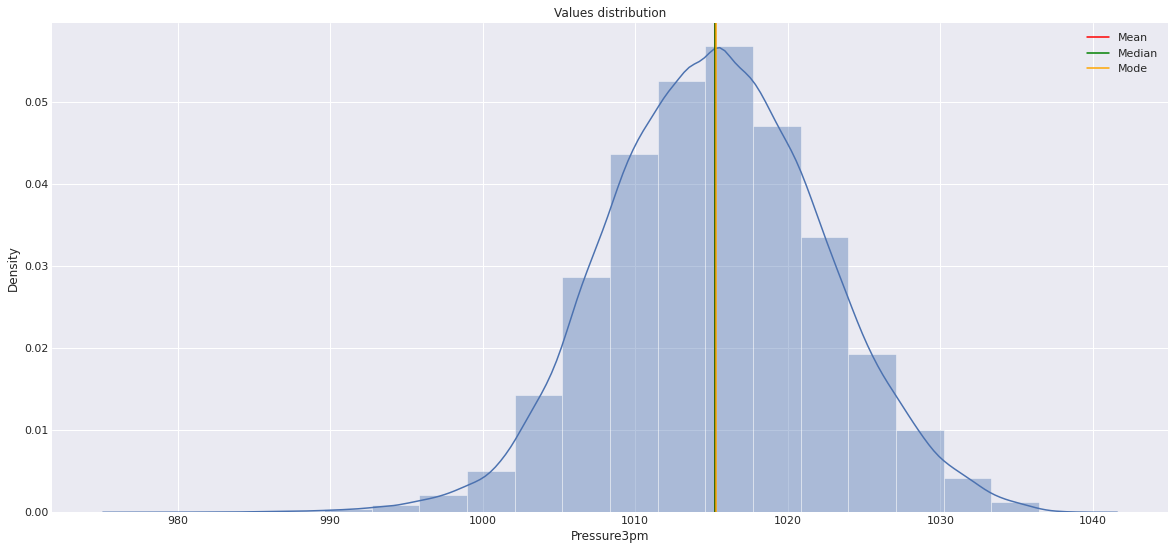

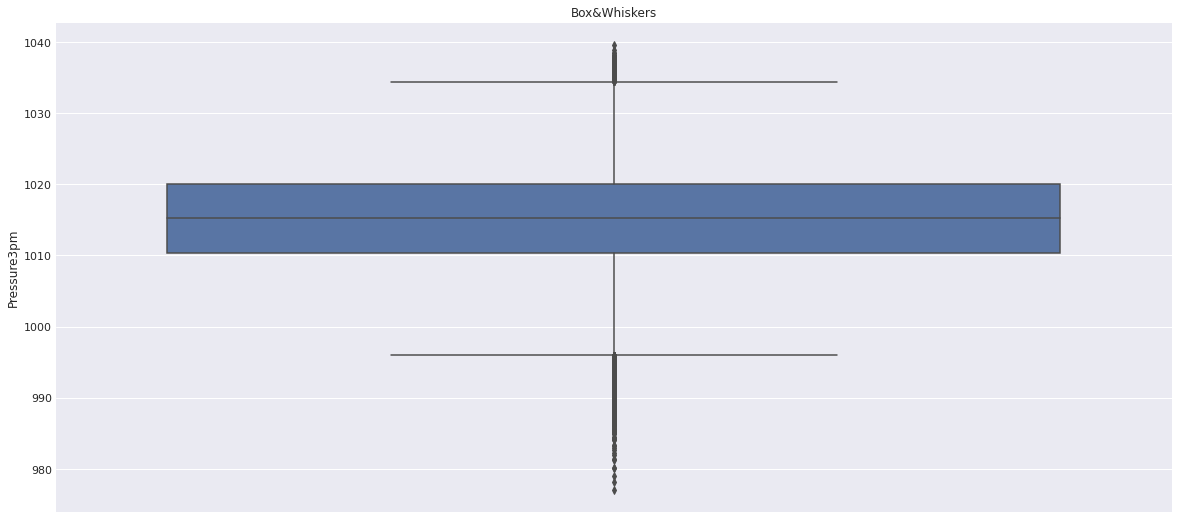

In [40]:
myplot_statistics('Pressure3pm')

Observamos distribuciones muy similares a gaussianas con poca presencia de outliers.

#### Cloud9am | Cloud3pm

In [41]:
print(df_weather['Cloud9am'].describe())
print(df_weather['Cloud3pm'].describe())

count    89572.000000
mean         4.447461
std          2.887159
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64
count    86102.000000
mean         4.509930
std          2.720357
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64


Las variables clouds son del tipo numérica enteras. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -8.0
Upper bound: 16.0
Outliers: 0
% Outliers: 0.0


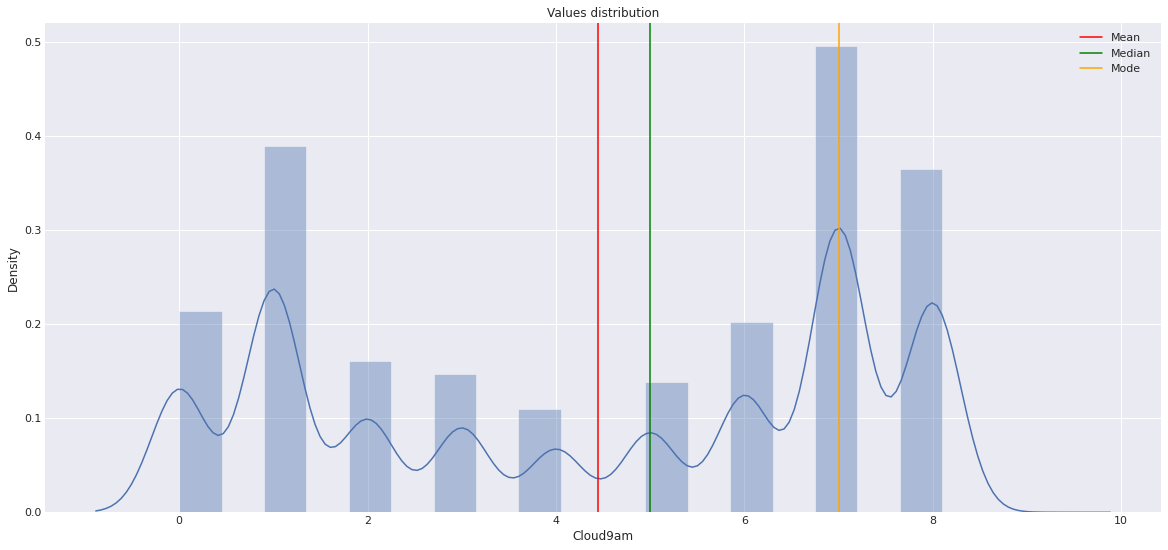

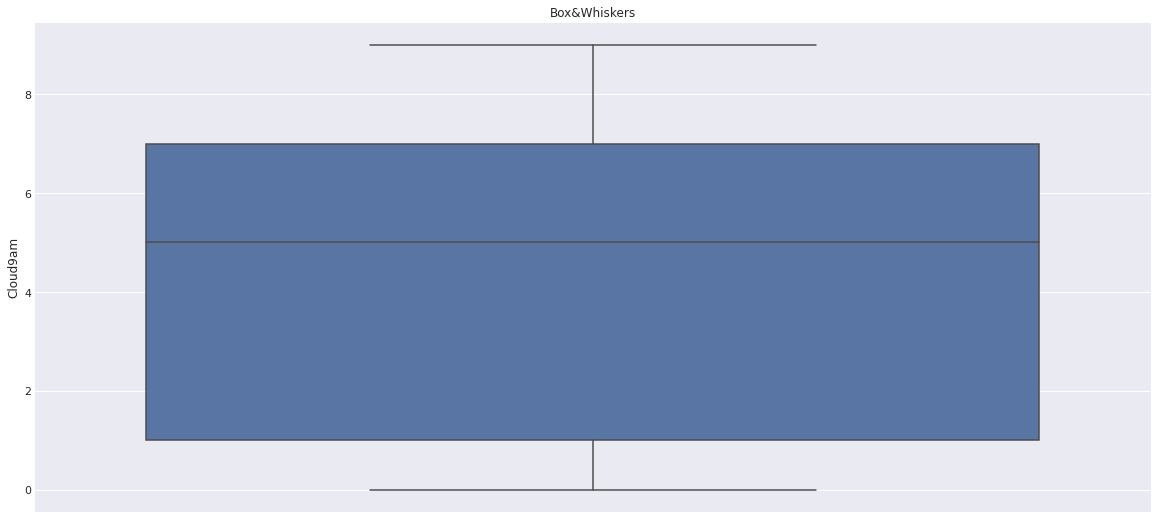

In [42]:
myplot_statistics('Cloud9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -5.5
Upper bound: 14.5
Outliers: 0
% Outliers: 0.0


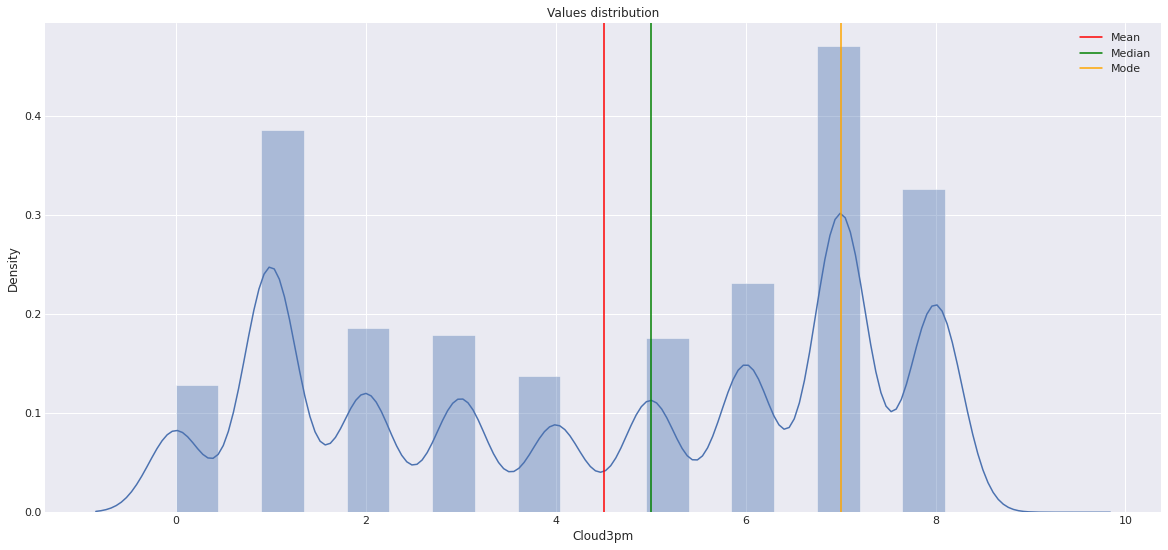

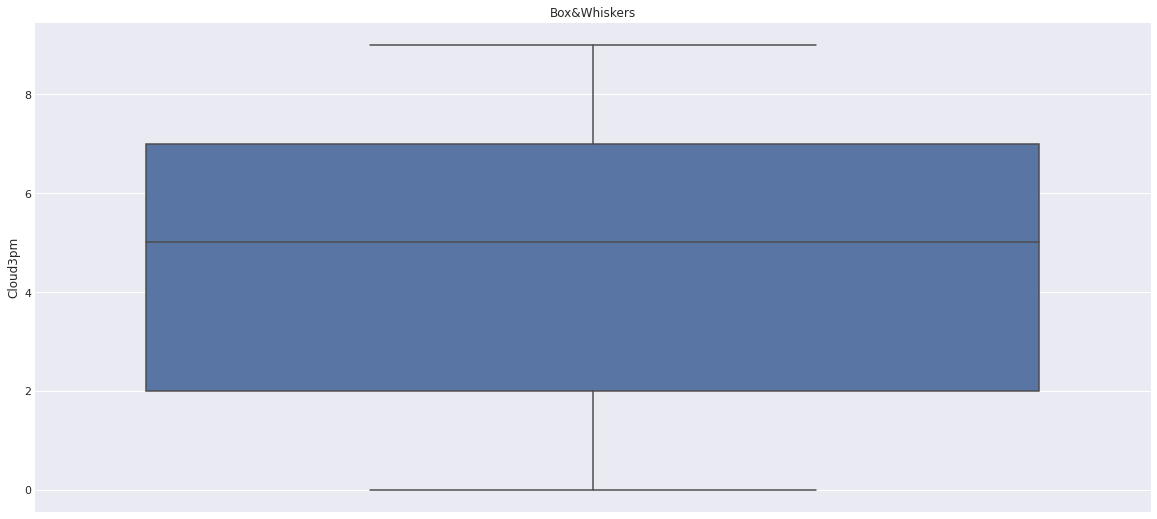

In [43]:
myplot_statistics('Cloud3pm')

Observamos distribuciones del tipo bimodal con dos picos en 1 y 8.

#### Temp9am | Temp3pm

In [44]:
print(df_weather['Temp9am'].describe())
print(df_weather['Temp3pm'].describe())

count    143693.000000
mean         16.990631
std           6.488753
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.600000
max          40.200000
Name: Temp9am, dtype: float64
count    141851.00000
mean         21.68339
std           6.93665
min          -5.40000
25%          16.60000
50%          21.10000
75%          26.40000
max          46.70000
Name: Temp3pm, dtype: float64


Las temperaturas son variables del tipo numérica de punto flotante. Graficamos su distribución.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: -1.6500000000000004
Upper bound: 35.550000000000004
Outliers: 262
% Outliers: 0.18233316863034385


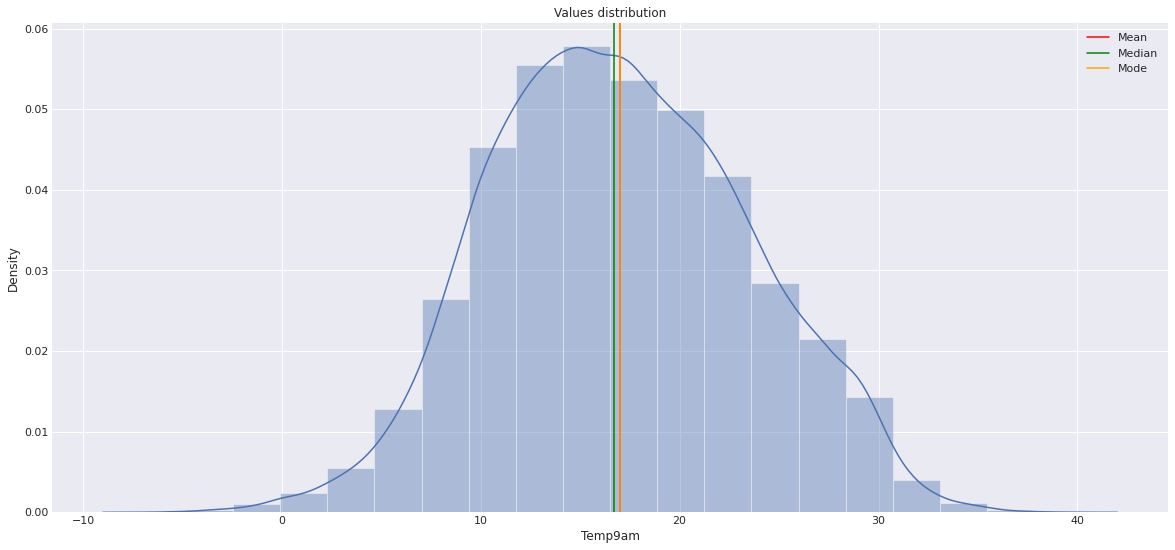

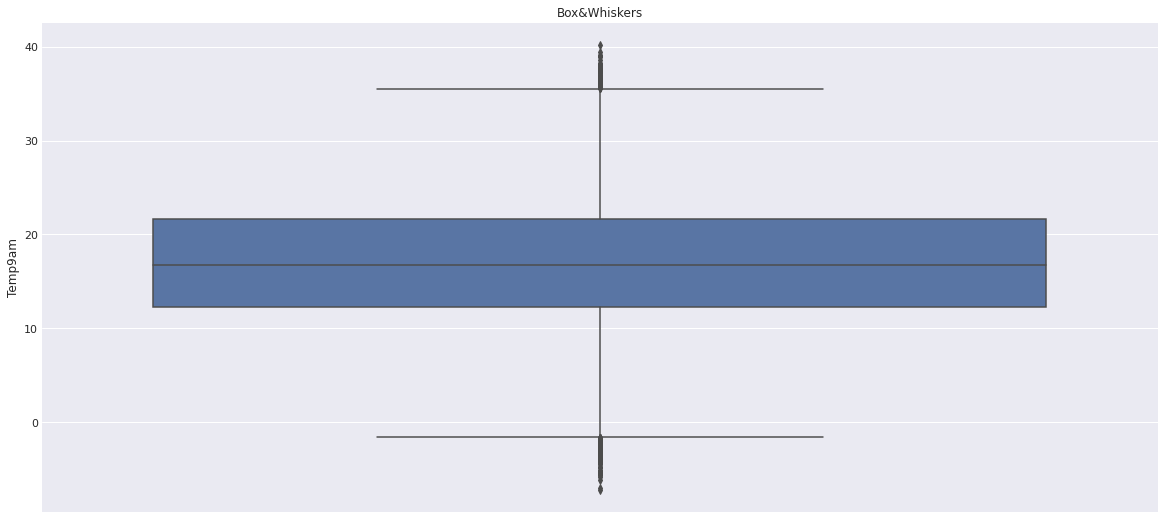

In [45]:
myplot_statistics('Temp9am')

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower bound: 1.9000000000000057
Upper bound: 41.099999999999994
Outliers: 764
% Outliers: 0.5385933127013557


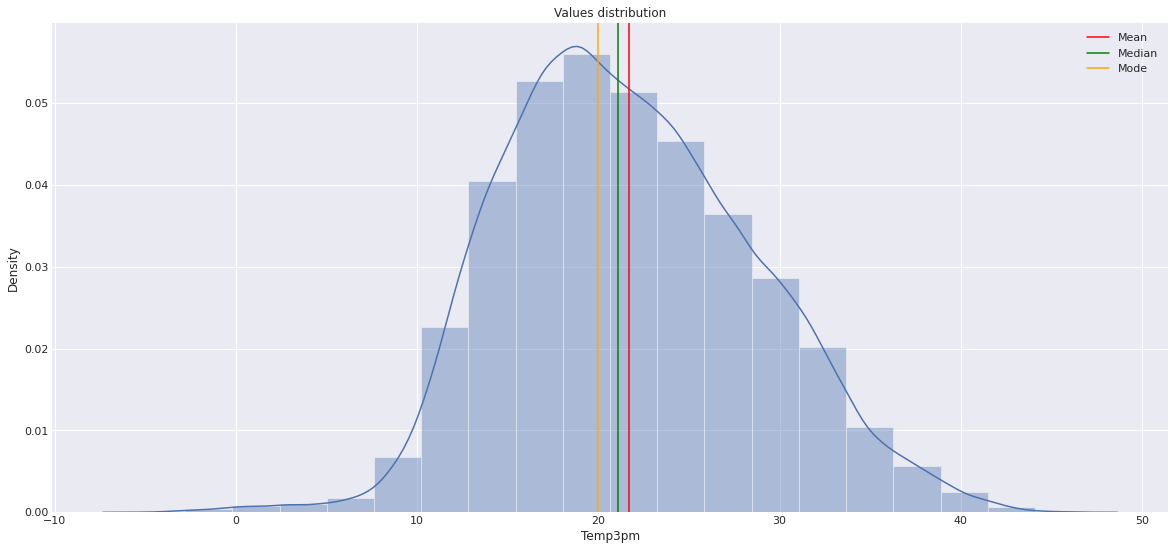

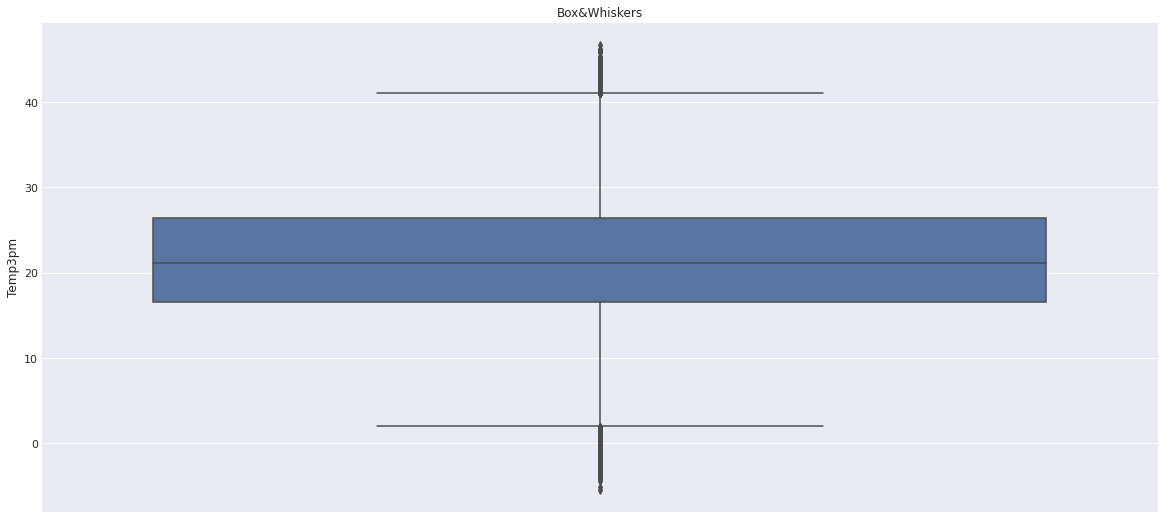

In [46]:
myplot_statistics('Temp3pm')

Observamos una distribución muy similar a la gaussiana con poca presencia de outliers.

#### RainToday

In [47]:
print(df_weather['RainToday'].describe())

count     142199
unique         2
top           No
freq      110319
Name: RainToday, dtype: object


In [48]:
print(df_weather.groupby('RainToday')['RainToday'].count())

RainToday
No     110319
Yes     31880
Name: RainToday, dtype: int64


RainToday es una variable categórica que representa un valor booleano. Podemos codificar No y Yes como 0 y 1 respectivamente.

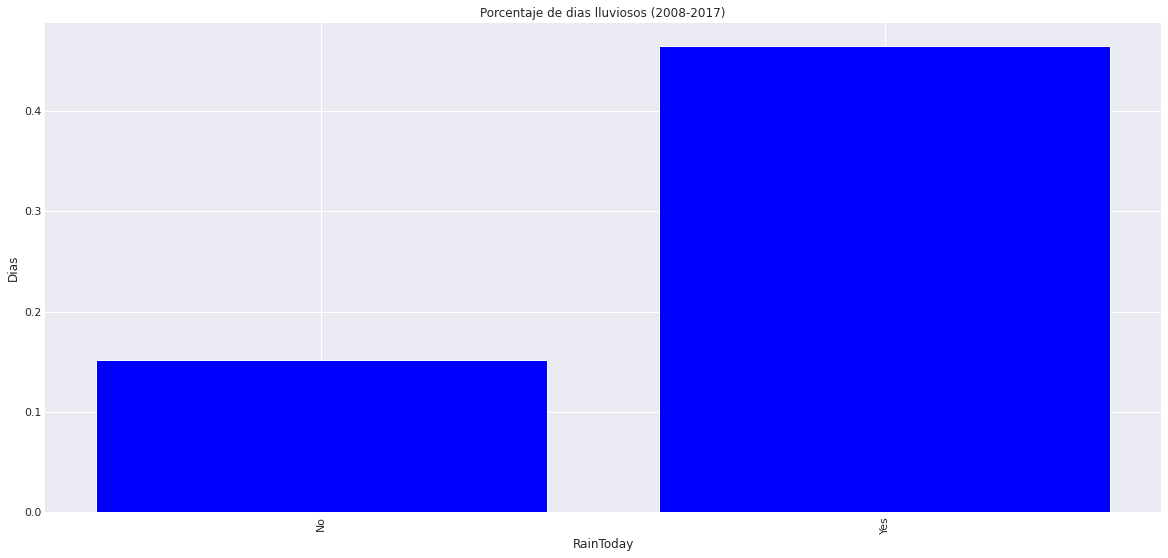

In [49]:
myplot_categorical('RainToday')

### Variable de Salida
#### RainTomorrow

In [50]:
df_weather['RainTomorrow'].describe()

count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [51]:
print(df_weather.groupby('RainTomorrow')['RainTomorrow'].count())

RainTomorrow
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


La variable de salida es RainTomorrow que es una variable categórica nominal representando una variable booleana. 

Notamos que las clases estan fuertemente desbalanceadas.

Codificaremos los 'No' y 'Yes' como 0 y 1 respectivamente.

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

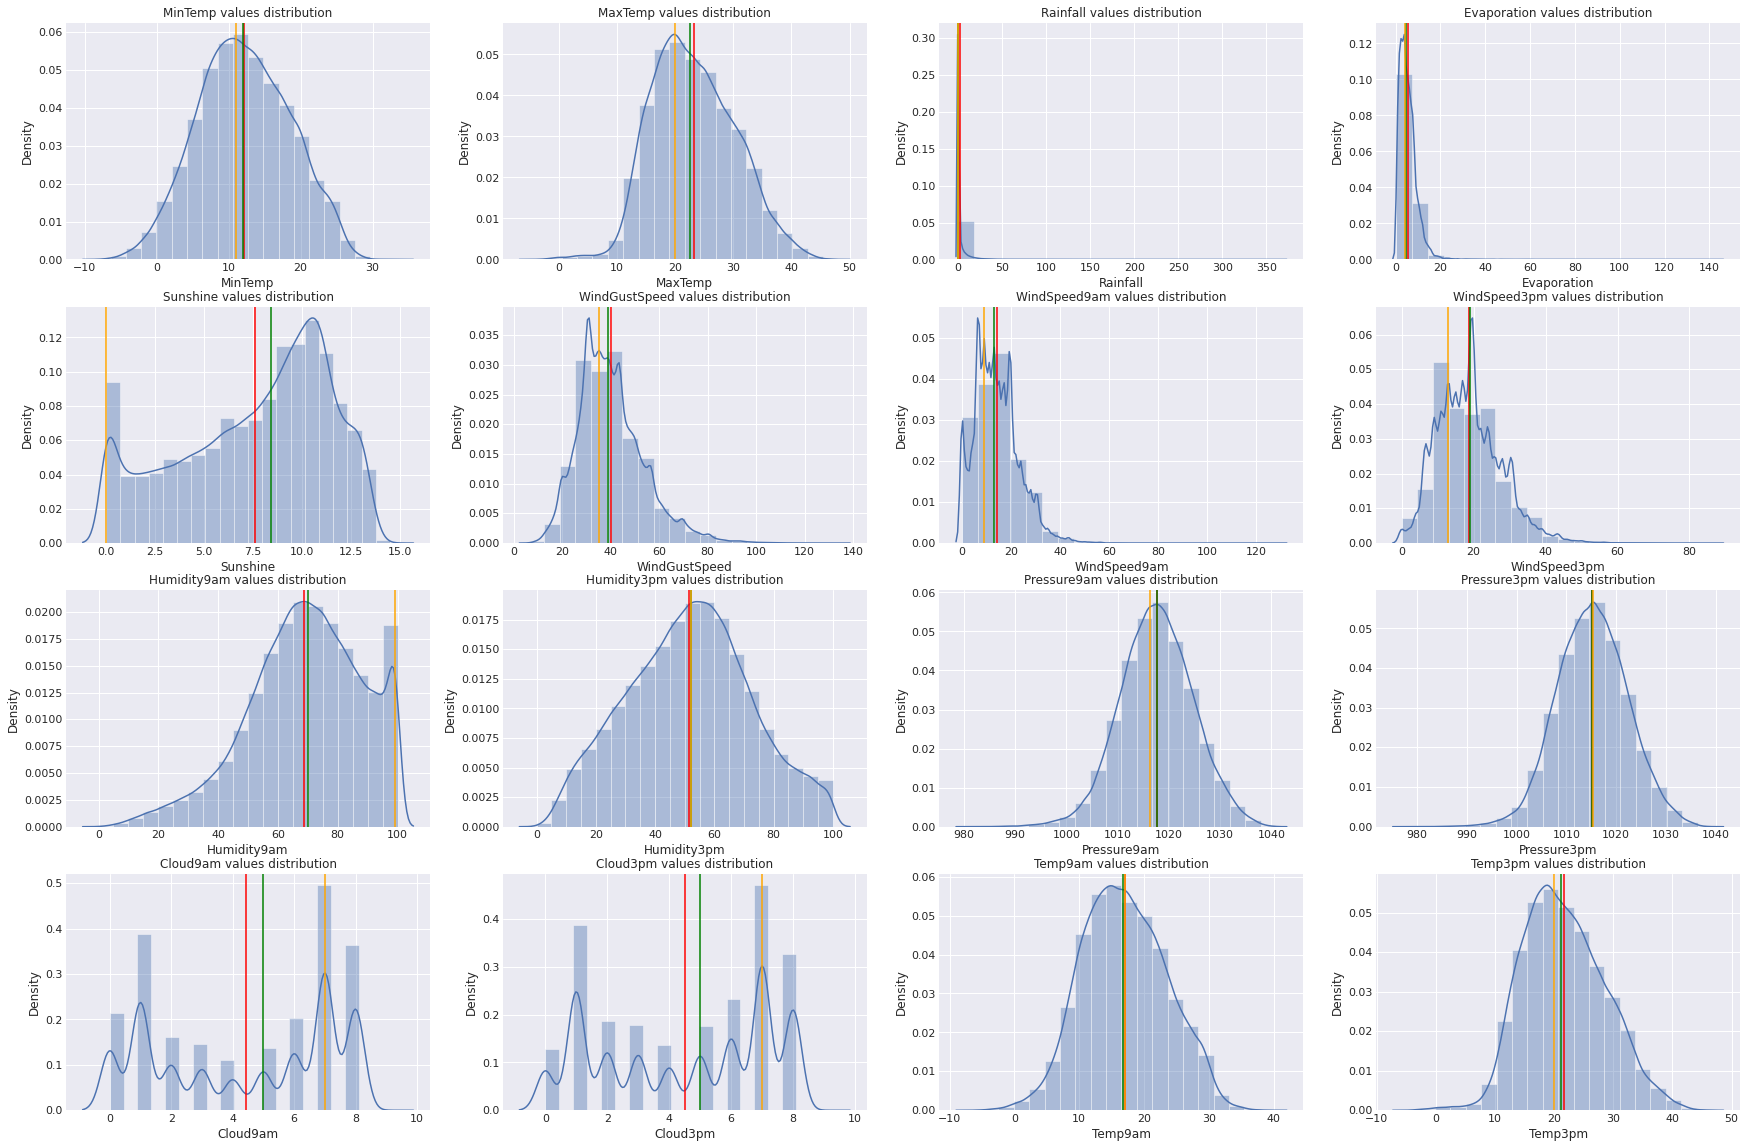

In [187]:
# Extra todas las gráficas de distribución para variables numéricas
def plot_dist_numeric():
    
    numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine', 'WindGustSpeed',\
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am',\
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
    
    fig,axes = plt.subplots(4,4,figsize=(30,20))
    
    for i,series in enumerate(numeric_features):
        j = i // 4
        k = i % 4
        numerical_series=df_weather[series][-df_weather[series].isnull()]
        sns.distplot(numerical_series, bins=20, ax=axes[j,k]).set_title(series+ ' values distribution')   
        axes[j,k].axvline(np.mean(numerical_series),color='red',label='Mean')
        axes[j,k].axvline(np.median(numerical_series),color='green',label='Median')
        axes[j,k].axvline(stat.mode(numerical_series),color='orange',label='Mode')
    
plot_dist_numeric()

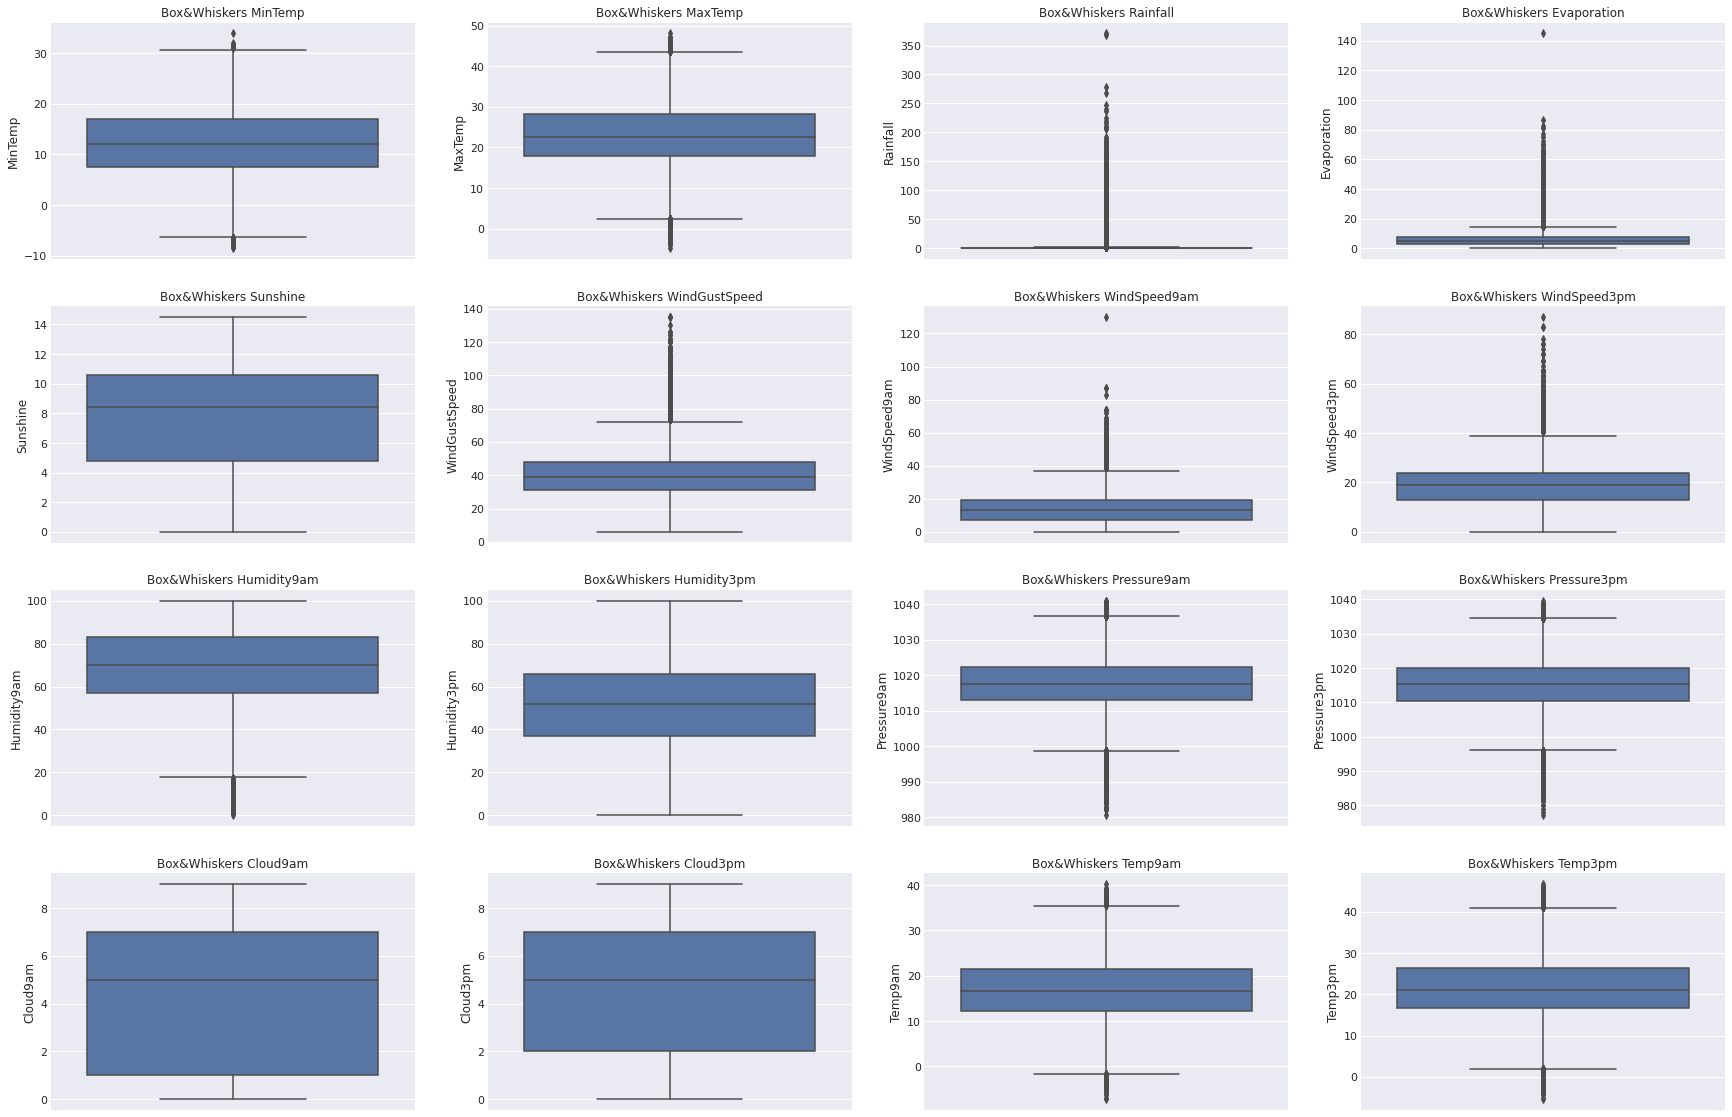

In [189]:
# Extra todas las gráficas de distribución para variables numéricas
def plot_box_numeric():
    
    numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine', 'WindGustSpeed',\
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am',\
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
    
    fig,axes = plt.subplots(4,4,figsize=(30,20))
    
    for i,series in enumerate(numeric_features):
        j = i // 4
        k = i % 4
        numerical_series=df_weather[series][-df_weather[series].isnull()]
        sns.boxplot(y=numerical_series, ax=axes[j,k])
        axes[j,k].set_title('Box&Whiskers ' + series)
    
plot_box_numeric()

-------------------------------------------------------------------------------------------------------
# 2- Esquema de validación de resultados

Particionaremos el dataset en entrenamiento y validación. También dejaremos una porción para realizar el testeo final del modelo. La partición se realizará 70% entrenamiento, 15% validacion, 15% testeo.

In [5]:
x = df_weather.drop('RainTomorrow',axis=1)
y = df_weather['RainTomorrow']

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.15, random_state=5)
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=0.176, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(101880, 22)
(101880,)
(21761, 22)
(21761,)
(21819, 22)
(21819,)


-------------------------------------------------------------------------------------------------------
# 3- Limpieza y preparacion de datos

## Datos Faltantes

Analizamos primero los datos faltantes, a que se debe y que técnicas de imputación podemos utilizar

In [11]:
print(x_train.isna().sum())
print(y_train.isna().sum())

Date                 0
Location             0
MinTemp           1052
MaxTemp            885
Rainfall          2297
Evaporation      44035
Sunshine         49001
WindGustDir       7268
WindGustSpeed     7221
WindDir9am        7465
WindDir3pm        2991
WindSpeed9am      1254
WindSpeed3pm      2164
Humidity9am       1867
Humidity3pm       3141
Pressure9am      10543
Pressure3pm      10518
Cloud9am         39023
Cloud3pm         41577
Temp9am           1253
Temp3pm           2529
RainToday         2297
dtype: int64
2306


In [12]:
#En porcentaje
print(x_train.isna().sum() / x_train.shape[0] * 100)
print(y_train.isna().sum() / y_train.shape[0] * 100)

Date              0.000000
Location          0.000000
MinTemp           1.032587
MaxTemp           0.868669
Rainfall          2.254613
Evaporation      43.222419
Sunshine         48.096781
WindGustDir       7.133883
WindGustSpeed     7.087750
WindDir9am        7.327248
WindDir3pm        2.935807
WindSpeed9am      1.230860
WindSpeed3pm      2.124068
Humidity9am       1.832548
Humidity3pm       3.083039
Pressure9am      10.348449
Pressure3pm      10.323910
Cloud9am         38.302905
Cloud3pm         40.809776
Temp9am           1.229878
Temp3pm           2.482332
RainToday         2.254613
dtype: float64
2.2634471927758146


Observamos excepto por date y location todas tienen datos faltantes. Revisamos una por una para evaluar los motivos.

#### MinTemp

In [18]:
x_train[x_train['MinTemp'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15728,2010-09-14,Newcastle,NaN,20.7,0.0,NaN,NaN,NaN,NaN,NaN,SE,0.0,6.0,65.0,58.0,NaN,NaN,8.0,4.0,17.4,20.5,No
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52563,2010-04-16,MountGinini,NaN,14.8,NaN,NaN,NaN,ENE,31.0,NaN,WNW,NaN,7.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,14.7,NaN
5459,2015-11-14,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69853,2016-01-03,Melbourne,NaN,NaN,NaN,8.2,7.8,SE,41.0,SSE,SSE,11.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN


Los valores faltantes parecen ser del tipo MCAR. Al ser baja cantidad, podríamos descartar estos casos o aplicar imputación por media, mediana o moda

#### MaxTemp

In [19]:
x_train[x_train['MaxTemp'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91551,2012-08-03,GoldCoast,8.3,NaN,0.0,NaN,NaN,NE,48.0,NW,WSW,19.0,15.0,52.0,23.0,1019.5,1015.9,NaN,NaN,14.7,20.5,No
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5459,2015-11-14,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69853,2016-01-03,Melbourne,NaN,NaN,NaN,8.2,7.8,SE,41.0,SSE,SSE,11.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143779,2017-03-15,Katherine,24.8,NaN,0.0,3.2,NaN,SE,30.0,WNW,ENE,2.0,17.0,82.0,NaN,1009.5,1005.6,0.0,NaN,28.7,NaN,No
69790,2015-11-01,Melbourne,NaN,NaN,NaN,7.0,5.2,N,72.0,N,S,46.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tambien parecen ser del tipo MCAR. Al ser baja cantidad, podríamos descartar estos casos o aplicar imputación por media, mediana o moda

#### Rainfall

In [20]:
x_train[x_train['Rainfall'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
128163,2012-09-26,Walpole,9.1,16.3,NaN,NaN,NaN,WNW,69.0,NW,W,24.0,24.0,90.0,89.0,1001.7,1001.0,NaN,NaN,11.3,11.4,NaN
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
41315,2014-02-10,Williamtown,14.5,27.4,NaN,NaN,NaN,S,46.0,SW,SSE,19.0,28.0,72.0,70.0,1018.3,1016.7,8.0,5.0,23.9,25.7,NaN
128362,2013-06-11,Walpole,4.9,16.2,NaN,NaN,NaN,NaN,NaN,ENE,NE,9.0,13.0,95.0,60.0,1028.5,1024.7,NaN,NaN,8.8,15.6,NaN
69061,2013-11-02,Melbourne,12.8,26.1,NaN,4.6,11.4,W,35.0,SW,S,11.0,11.0,52.0,33.0,1016.2,1013.1,NaN,NaN,18.6,24.6,NaN
68887,2013-05-12,Melbourne,16.5,22.1,NaN,7.2,3.5,N,59.0,N,N,44.0,35.0,44.0,39.0,1019.2,1015.4,NaN,NaN,18.2,21.6,NaN
54834,2016-10-01,MountGinini,-1.7,2.5,NaN,NaN,NaN,WSW,72.0,W,W,26.0,22.0,97.0,97.0,NaN,NaN,NaN,NaN,1.0,1.6,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN


A priori parece haber una relación entre los NaN de Rainfall y los NaN de Evaporation,Sunshine y RainToday. Comprobamos obteniendo el porcentaje

In [21]:
(x_train['Rainfall'].isna() & x_train['Evaporation'].isna()).sum() * 100 / \
x_train['Rainfall'].isna().sum()

70.78798432738354

In [22]:
(x_train['Rainfall'].isna() & x_train['Sunshine'].isna()).sum() * 100 / \
x_train['Rainfall'].isna().sum()

61.81976491075316

In [23]:
(x_train['Rainfall'].isna() & x_train['RainToday'].isna()).sum() * 100 / \
x_train['Rainfall'].isna().sum()

100.0

Dado los valores anteriores y la tabla, suponemos que los valores de Rainfall son MCAR ya que no se encuentra una relación del porque son faltantes, pero parte de los datos de RainToday son MNAR y se deben a la falta de valores de Rainfall.

Como técnica de imputación se propone utilizar categoría faltante o frecuente.

#### Evaporation

Este caso es de gran interes por la gran cantidad de faltantes

In [24]:
x_train[x_train['Evaporation'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
697,2010-10-29,Albury,10.3,25.6,0.0,NaN,NaN,NE,39.0,E,ENE,7.0,24.0,70.0,44.0,1017.2,1012.6,NaN,NaN,17.1,25.5,No
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
57933,2016-11-29,Ballarat,8.2,24.6,0.0,NaN,NaN,ESE,41.0,S,W,9.0,13.0,77.0,35.0,1012.7,1010.6,7.0,NaN,14.0,23.3,No
144673,2015-05-01,Uluru,4.8,25.3,0.0,NaN,NaN,ENE,28.0,E,SSW,11.0,6.0,31.0,9.0,1021.4,1017.8,NaN,NaN,13.3,24.0,No
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
113077,2013-04-05,Witchcliffe,14.8,25.6,0.2,NaN,NaN,W,31.0,W,SSW,13.0,11.0,69.0,93.0,1016.2,1017.4,NaN,NaN,22.3,18.9,No
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
57055,2014-07-05,Ballarat,4.2,10.7,3.4,NaN,NaN,WSW,54.0,WNW,W,24.0,30.0,100.0,91.0,1014.0,1013.8,8.0,8.0,7.3,9.7,Yes
72606,2015-04-22,Mildura,6.7,21.1,0.0,NaN,NaN,S,26.0,SSE,SSW,15.0,13.0,75.0,36.0,1025.1,1020.6,NaN,NaN,11.1,20.2,No
20698,2016-05-01,NorahHead,18.5,23.5,7.2,NaN,NaN,N,46.0,N,N,20.0,35.0,100.0,83.0,1015.4,1010.8,NaN,NaN,19.7,21.8,Yes


Observando la tabla anterior, pareciera que hay ciudades donde no se mide la Evaporacion. Chequeamos este supuesto

In [25]:
x_train[x_train['Evaporation'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            0.470722
Albany              0.099154
Albury              1.000000
AliceSprings        0.071196
BadgerysCreek       1.000000
Ballarat            1.000000
Bendigo             0.597099
Brisbane            0.007210
Cairns              0.121666
Canberra            0.467670
Cobar               0.115040
CoffsHarbour        0.398944
Dartmoor            0.129801
Darwin              0.017865
GoldCoast           1.000000
Hobart              0.002225
Katherine           0.063906
Launceston          0.957150
Melbourne           0.000894
MelbourneAirport    0.000475
Mildura             0.038886
Moree               0.244346
MountGambier        0.134083
MountGinini         1.000000
Newcastle           1.000000
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.076518
Nuriootpa           0.039178
PearceRAAF          1.000000
Penrith             1.000000
Perth               0.000447
PerthAirport             NaN
Portland            0.140648
Richm

Comprobamos entonces que hay gran cantidad de NaN porque hay ciudades donde no se mide la Evaporacion (MNAR). 

En este caso proponemos como técnica la imputación con valor arbitrario (-1)  o fin de cola

#### Sunshine
Este caso es de interes por la gran cantidad de faltantes

In [26]:
x_train[x_train['Sunshine'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
697,2010-10-29,Albury,10.3,25.6,0.0,NaN,NaN,NE,39.0,E,ENE,7.0,24.0,70.0,44.0,1017.2,1012.6,NaN,NaN,17.1,25.5,No
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
57933,2016-11-29,Ballarat,8.2,24.6,0.0,NaN,NaN,ESE,41.0,S,W,9.0,13.0,77.0,35.0,1012.7,1010.6,7.0,NaN,14.0,23.3,No
144673,2015-05-01,Uluru,4.8,25.3,0.0,NaN,NaN,ENE,28.0,E,SSW,11.0,6.0,31.0,9.0,1021.4,1017.8,NaN,NaN,13.3,24.0,No
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
113077,2013-04-05,Witchcliffe,14.8,25.6,0.2,NaN,NaN,W,31.0,W,SSW,13.0,11.0,69.0,93.0,1016.2,1017.4,NaN,NaN,22.3,18.9,No
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
57055,2014-07-05,Ballarat,4.2,10.7,3.4,NaN,NaN,WSW,54.0,WNW,W,24.0,30.0,100.0,91.0,1014.0,1013.8,8.0,8.0,7.3,9.7,Yes
72606,2015-04-22,Mildura,6.7,21.1,0.0,NaN,NaN,S,26.0,SSE,SSW,15.0,13.0,75.0,36.0,1025.1,1020.6,NaN,NaN,11.1,20.2,No
20698,2016-05-01,NorahHead,18.5,23.5,7.2,NaN,NaN,N,46.0,N,N,20.0,35.0,100.0,83.0,1015.4,1010.8,NaN,NaN,19.7,21.8,Yes


Al igual que en el caso anterior, pareciera que hay ciudades donde no se mide la Evaporacion. Chequeamos este supuesto

In [27]:
x_train[x_train['Sunshine'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            0.448933
Albany              0.177162
Albury              1.000000
AliceSprings        0.172173
BadgerysCreek       1.000000
Ballarat            1.000000
Bendigo             1.000000
Brisbane            0.013970
Cairns              0.159102
Canberra            0.561204
Cobar               0.816124
CoffsHarbour        0.492559
Dartmoor            0.141468
Darwin              0.000893
GoldCoast           1.000000
Hobart              0.005340
Katherine           1.000000
Launceston          1.000000
Melbourne           0.000447
MelbourneAirport    0.000475
Mildura             0.040807
Moree               0.326450
MountGambier        0.144866
MountGinini         1.000000
Newcastle           1.000000
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.143472
Nuriootpa           0.055423
PearceRAAF          0.000946
Penrith             1.000000
Perth               0.002233
PerthAirport        0.002349
Portland            0.151281
Richm

Comprobamos la suposición. Proponemos como técnica la imputación con valor arbitrario (-1)  o fin de cola

#### WindGustDir

In [28]:
x_train[x_train['WindGustDir'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
110284,2013-11-07,Albany,13.5,17.4,1.8,2.0,6.3,NaN,NaN,ESE,ESE,19.0,24.0,57.0,64.0,1024.5,1023.5,7.0,5.0,16.0,16.5,Yes
30939,2010-03-05,Sydney,20.5,25.1,0.0,5.2,1.0,NaN,NaN,NE,ENE,20.0,15.0,72.0,83.0,1011.5,1009.6,7.0,8.0,23.9,23.5,No
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
15158,2009-02-21,Newcastle,22.0,25.8,0.0,NaN,NaN,NaN,NaN,SE,SE,6.0,9.0,78.0,76.0,NaN,NaN,8.0,8.0,24.0,23.8,No
30355,2008-07-29,Sydney,8.0,15.0,33.2,1.4,6.9,NaN,NaN,W,SSW,22.0,20.0,86.0,59.0,1017.2,1015.1,6.0,6.0,9.1,13.5,Yes
109311,2010-12-11,Albany,15.2,20.0,0.0,5.2,4.0,NaN,NaN,SW,SE,19.0,11.0,79.0,59.0,1019.0,1015.8,8.0,6.0,16.9,19.0,No
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
15090,2008-12-15,Newcastle,16.6,22.8,0.0,NaN,NaN,NaN,NaN,S,SE,9.0,28.0,42.0,49.0,NaN,NaN,4.0,1.0,20.4,21.8,No
15490,2010-01-19,Newcastle,14.0,26.6,0.0,NaN,NaN,NaN,NaN,SE,NE,6.0,4.0,14.0,38.0,NaN,NaN,1.0,2.0,26.6,25.0,No


A priori parecería haber relación con Evaporation, Sunshine y WindGustSpeed. Chequeamos este supuesto

In [29]:
(x_train['WindGustDir'].isna() & x_train['Evaporation'].isna()).sum() * 100 / \
x_train['WindGustDir'].isna().sum()

50.9768849752339

In [30]:
(x_train['WindGustDir'].isna() & x_train['Sunshine'].isna()).sum() * 100 / \
x_train['WindGustDir'].isna().sum()

55.99889928453495

In [31]:
(x_train['WindGustDir'].isna() & x_train['WindGustSpeed'].isna()).sum() * 100 / \
x_train['WindGustDir'].isna().sum()

99.35332966428179

Suponemos que los NaN en este caso son días que no se midió la velocidad y dirección máxima del viento. Aún así son al azar por lo que podríamos decir que son MAR.

Se puede utilizar la imputación por categoría faltante o por categoría frecuente. También podríamos aplicar MICE con las direcciones 9am y 3pm

#### WindGustSpeed

In [35]:
x_train[x_train['WindGustSpeed'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
110284,2013-11-07,Albany,13.5,17.4,1.8,2.0,6.3,NaN,NaN,ESE,ESE,19.0,24.0,57.0,64.0,1024.5,1023.5,7.0,5.0,16.0,16.5,Yes
30939,2010-03-05,Sydney,20.5,25.1,0.0,5.2,1.0,NaN,NaN,NE,ENE,20.0,15.0,72.0,83.0,1011.5,1009.6,7.0,8.0,23.9,23.5,No
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
15158,2009-02-21,Newcastle,22.0,25.8,0.0,NaN,NaN,NaN,NaN,SE,SE,6.0,9.0,78.0,76.0,NaN,NaN,8.0,8.0,24.0,23.8,No
30355,2008-07-29,Sydney,8.0,15.0,33.2,1.4,6.9,NaN,NaN,W,SSW,22.0,20.0,86.0,59.0,1017.2,1015.1,6.0,6.0,9.1,13.5,Yes
109311,2010-12-11,Albany,15.2,20.0,0.0,5.2,4.0,NaN,NaN,SW,SE,19.0,11.0,79.0,59.0,1019.0,1015.8,8.0,6.0,16.9,19.0,No
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
15090,2008-12-15,Newcastle,16.6,22.8,0.0,NaN,NaN,NaN,NaN,S,SE,9.0,28.0,42.0,49.0,NaN,NaN,4.0,1.0,20.4,21.8,No
15490,2010-01-19,Newcastle,14.0,26.6,0.0,NaN,NaN,NaN,NaN,SE,NE,6.0,4.0,14.0,38.0,NaN,NaN,1.0,2.0,26.6,25.0,No


In [32]:
(x_train['WindGustSpeed'].isna() & x_train['Evaporation'].isna()).sum() * 100 / \
x_train['WindGustSpeed'].isna().sum()

50.92092507962886

In [33]:
(x_train['WindGustSpeed'].isna() & x_train['Sunshine'].isna()).sum() * 100 / \
x_train['WindGustSpeed'].isna().sum()

55.934081152194985

In [34]:
(x_train['WindGustSpeed'].isna() & x_train['WindGustDir'].isna()).sum() * 100 / \
x_train['WindGustSpeed'].isna().sum()

100.0

Las conclusiones son las mismas que para WindGustSpeed.

En este caso podríamos utilizar la imputación por mediana o por moda (aunque el porcentaje es ligeramente superior al 5%), por muestreo aleatorio o algún metodo de imputación multivariada como MICE o Knn utilizando WindGustSpeed9am y WindGustSpeed3pm  

#### WindDir9am

In [36]:
x_train[x_train['WindDir9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
28080,2011-08-02,Richmond,1.3,23.3,0.2,1.8,NaN,NE,19.0,NaN,NE,0.0,11.0,99.0,29.0,1023.9,1020.6,NaN,NaN,8.0,23.1,No
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
50292,2012-06-23,Tuggeranong,-2.3,11.0,0.0,NaN,NaN,WNW,33.0,NaN,W,0.0,17.0,100.0,48.0,1022.8,1022.2,NaN,NaN,1.3,10.4,No
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
25635,2013-04-16,Penrith,16.0,20.7,18.4,NaN,NaN,SSE,22.0,NaN,SW,0.0,11.0,99.0,81.0,NaN,NaN,NaN,NaN,16.9,19.7,Yes
26892,2016-09-24,Penrith,9.7,24.7,0.0,NaN,NaN,ENE,22.0,NaN,E,0.0,9.0,72.0,44.0,NaN,NaN,NaN,NaN,18.0,23.8,No
28676,2013-05-18,Richmond,1.8,19.8,0.0,NaN,NaN,W,31.0,NaN,SW,0.0,17.0,75.0,30.0,1015.4,1012.1,NaN,NaN,10.6,19.5,No
83217,2015-04-28,Dartmoor,4.5,14.0,0.4,1.2,1.4,SSE,26.0,NaN,NaN,0.0,0.0,NaN,NaN,1030.9,1030.0,NaN,NaN,9.3,13.3,No
105057,2016-02-07,Nuriootpa,14.9,32.3,0.0,8.0,12.7,SW,33.0,NaN,WSW,0.0,20.0,64.0,23.0,1017.4,1016.0,0.0,NaN,20.9,31.7,No


In [37]:
(x_train['WindDir9am'].isna() & x_train['Evaporation'].isna()).sum() * 100 / \
x_train['WindDir9am'].isna().sum()

65.1707970529136

In [38]:
(x_train['WindDir9am'].isna() & x_train['Sunshine'].isna()).sum() * 100 / \
x_train['WindDir9am'].isna().sum()

73.36905559276624

In [78]:
(df_weather['WindDir9am'].isna() & df_weather['WindGustDir'].isna()).sum() * 100 / \
df_weather['WindDir9am'].isna().sum()

27.929206890024606

In [39]:
(x_train['WindDir9am'].isna() & x_train['WindSpeed9am'].isna()).sum() * 100 / \
x_train['WindDir9am'].isna().sum()

16.79839249832552

Parece haber una relación entre los NaN de WindDir9am y Sunshine o Evaporation. Si recordamos estas variables no se tomaban en algunas ciudades. Podemos corroborar si es el caso también para WindDir9am

In [40]:
x_train[x_train['WindDir9am'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            0.084884
Albany              0.084117
Albury              0.169855
AliceSprings        0.083760
BadgerysCreek       0.149431
Ballarat            0.031178
Bendigo             0.078147
Brisbane            0.022983
Cairns              0.013570
Canberra            0.156974
Cobar               0.007072
CoffsHarbour        0.118099
Dartmoor            0.197375
Darwin              0.010272
GoldCoast           0.020525
Hobart              0.014241
Katherine           0.026103
Launceston          0.153237
Melbourne           0.013858
MelbourneAirport    0.014734
Mildura             0.028325
Moree               0.036873
MountGambier        0.028129
MountGinini         0.082006
Newcastle           0.460520
Nhil                0.032051
NorahHead           0.036500
NorfolkIsland       0.010043
Nuriootpa           0.044434
PearceRAAF          0.027423
Penrith             0.186950
Perth               0.044663
PerthAirport        0.011743
Portland            0.023683
Richm

Parece no ser el caso, por lo que suponemos MCAR. Como técnica de imputación aplicaría categoría faltante.

#### WindDir3pm

In [42]:
x_train[x_train['WindDir3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
102470,2017-04-04,MountGambier,5.1,23.4,0.0,NaN,NaN,NaN,NaN,ESE,NaN,4.0,NaN,89.0,45.0,1028.9,1025.1,7.0,1.0,13.1,22.5,No
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
52561,2010-04-14,MountGinini,6.1,15.3,0.0,NaN,NaN,W,26.0,W,NaN,15.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,10.5,NaN,No
83217,2015-04-28,Dartmoor,4.5,14.0,0.4,1.2,1.4,SSE,26.0,NaN,NaN,0.0,0.0,NaN,NaN,1030.9,1030.0,NaN,NaN,9.3,13.3,No
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133649,2010-08-11,Launceston,8.1,12.4,7.9,NaN,NaN,SSE,56.0,E,NaN,6.0,0.0,95.0,83.0,1002.1,1001.0,NaN,NaN,11.9,11.7,Yes
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En principo pareciera que es MCAR. Como técnica de imputación aplicaría categoría frecuente o categoría faltante.

#### WindSpeed9am

In [43]:
x_train[x_train['WindSpeed9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN
92133,2014-05-06,GoldCoast,13.4,22.8,0.0,NaN,NaN,NaN,NaN,NaN,SSE,NaN,19.0,54.0,55.0,1020.4,1017.6,NaN,NaN,19.3,21.8,No
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10916,2014-05-02,CoffsHarbour,15.8,21.5,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,78.0,NaN,NaN,NaN,NaN,20.2,20.0,Yes
52563,2010-04-16,MountGinini,NaN,14.8,NaN,NaN,NaN,ENE,31.0,NaN,WNW,NaN,7.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,14.7,NaN
46390,2010-01-12,Canberra,18.9,39.8,0.0,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,13.0,NaN,NaN,NaN,NaN,29.3,38.3,No


In [44]:
(x_train['WindSpeed9am'].isna() & x_train['WindDir9am'].isna()).sum() * 100 / \
x_train['WindSpeed9am'].isna().sum()

100.0

Observamos que hay relación entre los valores faltantes de WindSpeed9am y de WindDir9am. Podemos suponer que los faltantes en WindSpeed9am son porque no se realizaron mediciones ese día a las 9am.
Sin embargo no se conoce la causa de porque no se realizaron estas mediciones. 

Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### WindSpeed3pm

In [45]:
x_train[x_train['WindSpeed3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
30652,2009-05-22,Sydney,15.6,19.6,4.6,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,85.0,1023.6,1020.8,8.0,8.0,19.1,17.5,Yes
102470,2017-04-04,MountGambier,5.1,23.4,0.0,NaN,NaN,NaN,NaN,ESE,NaN,4.0,NaN,89.0,45.0,1028.9,1025.1,7.0,1.0,13.1,22.5,No
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
52561,2010-04-14,MountGinini,6.1,15.3,0.0,NaN,NaN,W,26.0,W,NaN,15.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,10.5,NaN,No
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10916,2014-05-02,CoffsHarbour,15.8,21.5,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,78.0,NaN,NaN,NaN,NaN,20.2,20.0,Yes
110965,2015-09-19,Albany,12.0,14.6,3.8,4.2,6.5,NaN,NaN,SW,NaN,56.0,NaN,73.0,NaN,1026.0,1027.7,6.0,NaN,12.9,NaN,Yes


In [46]:
(x_train['WindSpeed3pm'].isna() & x_train['WindDir3pm'].isna()).sum() * 100 / \
x_train['WindSpeed3pm'].isna().sum()

100.0

In [47]:
(x_train['WindSpeed3pm'].isna() & x_train['WindGustSpeed'].isna()).sum() * 100 / \
x_train['WindSpeed3pm'].isna().sum()

90.4343807763401

Observamos que hay relación entre los valores faltantes de WindSpeed3pm y de WindDir3pm. Podemos suponer que los faltantes en WindSpeed3pm son porque no se realizaron mediciones ese día a las 3pm.
También observamos que cuando no se toma la medición de speed a las 3 pm es muy probable que no se tenga la medición de WindGustSpeed

No se conoce la causa de porque no se realizaron estas mediciones. 

Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### Humidity9am

In [48]:
x_train[x_train['Humidity9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
106437,2011-06-25,Woomera,5.6,19.4,0.0,4.0,9.8,N,46.0,NE,NNW,22.0,19.0,NaN,NaN,1026.5,1022.9,0.0,0.0,10.3,19.2,No
83217,2015-04-28,Dartmoor,4.5,14.0,0.4,1.2,1.4,SSE,26.0,NaN,NaN,0.0,0.0,NaN,NaN,1030.9,1030.0,NaN,NaN,9.3,13.3,No
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52563,2010-04-16,MountGinini,NaN,14.8,NaN,NaN,NaN,ENE,31.0,NaN,WNW,NaN,7.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,14.7,NaN
5459,2015-11-14,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69853,2016-01-03,Melbourne,NaN,NaN,NaN,8.2,7.8,SE,41.0,SSE,SSE,11.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
(x_train['Humidity9am'].isna() & x_train['Temp9am'].isna()).sum() * 100 / \
x_train['Humidity9am'].isna().sum()

67.11301553294055

A priori parecen ser MCAR. Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### Humidity3pm

In [50]:
x_train[x_train['Humidity3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
106437,2011-06-25,Woomera,5.6,19.4,0.0,4.0,9.8,N,46.0,NE,NNW,22.0,19.0,NaN,NaN,1026.5,1022.9,0.0,0.0,10.3,19.2,No
52561,2010-04-14,MountGinini,6.1,15.3,0.0,NaN,NaN,W,26.0,W,NaN,15.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,10.5,NaN,No
83217,2015-04-28,Dartmoor,4.5,14.0,0.4,1.2,1.4,SSE,26.0,NaN,NaN,0.0,0.0,NaN,NaN,1030.9,1030.0,NaN,NaN,9.3,13.3,No
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142440,2013-07-15,Katherine,14.4,32.2,0.0,6.8,NaN,E,48.0,ESE,SE,9.0,19.0,66.0,NaN,1016.0,1011.9,0.0,0.0,22.2,31.0,No
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143466,2016-05-06,Katherine,23.0,36.6,0.0,8.0,NaN,E,37.0,SW,ESE,4.0,19.0,64.0,NaN,1012.1,1007.6,0.0,NaN,29.0,NaN,No
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A priori parecen ser MCAR. Como tecnica de imputación se sugiere utilizar la imputación por mediana/moda, o aplicar muestreo aleatorio.

#### Pressure9am

In [51]:
x_train[x_train['Pressure9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
15158,2009-02-21,Newcastle,22.0,25.8,0.0,NaN,NaN,NaN,NaN,SE,SE,6.0,9.0,78.0,76.0,NaN,NaN,8.0,8.0,24.0,23.8,No
135436,2015-09-30,Launceston,2.7,18.4,0.0,NaN,NaN,NNW,28.0,SSE,NW,15.0,17.0,55.0,43.0,NaN,NaN,NaN,NaN,12.7,17.6,No
53192,2012-02-04,MountGinini,8.3,19.9,21.0,NaN,NaN,SSW,26.0,SSW,W,13.0,11.0,84.0,57.0,NaN,NaN,NaN,NaN,11.6,18.6,Yes
15090,2008-12-15,Newcastle,16.6,22.8,0.0,NaN,NaN,NaN,NaN,S,SE,9.0,28.0,42.0,49.0,NaN,NaN,4.0,1.0,20.4,21.8,No
135169,2015-01-06,Launceston,11.2,27.5,0.0,NaN,NaN,NW,35.0,ESE,NW,7.0,13.0,65.0,39.0,NaN,NaN,NaN,1.0,19.2,25.8,No
15490,2010-01-19,Newcastle,14.0,26.6,0.0,NaN,NaN,NaN,NaN,SE,NE,6.0,4.0,14.0,38.0,NaN,NaN,1.0,2.0,26.6,25.0,No
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
54433,2015-08-27,MountGinini,0.5,3.7,4.2,NaN,NaN,W,39.0,N,W,9.0,20.0,97.0,97.0,NaN,NaN,NaN,NaN,3.0,2.2,Yes


In [52]:
x_train[x_train['Pressure9am'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            0.002724
Albany              0.008929
Albury              0.001867
AliceSprings        0.000465
BadgerysCreek       0.057400
Ballarat            0.006878
Bendigo             0.004679
Brisbane            0.000451
Cairns              0.000468
Canberra            0.067507
Cobar               0.008015
CoffsHarbour        0.104177
Dartmoor            0.021877
Darwin                   NaN
GoldCoast           0.000477
Hobart                   NaN
Katherine                NaN
Launceston          0.378202
Melbourne           0.148413
MelbourneAirport         NaN
Mildura             0.000960
Moree                    NaN
MountGambier        0.000469
MountGinini         1.000000
Newcastle           1.000000
Nhil                0.002747
NorahHead           0.013102
NorfolkIsland       0.002869
Nuriootpa           0.001433
PearceRAAF          0.006147
Penrith             1.000000
Perth                    NaN
PerthAirport        0.000939
Portland            0.004350
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la presión.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Pressure3pm

In [53]:
x_train[x_train['Pressure3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
15158,2009-02-21,Newcastle,22.0,25.8,0.0,NaN,NaN,NaN,NaN,SE,SE,6.0,9.0,78.0,76.0,NaN,NaN,8.0,8.0,24.0,23.8,No
135436,2015-09-30,Launceston,2.7,18.4,0.0,NaN,NaN,NNW,28.0,SSE,NW,15.0,17.0,55.0,43.0,NaN,NaN,NaN,NaN,12.7,17.6,No
53192,2012-02-04,MountGinini,8.3,19.9,21.0,NaN,NaN,SSW,26.0,SSW,W,13.0,11.0,84.0,57.0,NaN,NaN,NaN,NaN,11.6,18.6,Yes
15090,2008-12-15,Newcastle,16.6,22.8,0.0,NaN,NaN,NaN,NaN,S,SE,9.0,28.0,42.0,49.0,NaN,NaN,4.0,1.0,20.4,21.8,No
135169,2015-01-06,Launceston,11.2,27.5,0.0,NaN,NaN,NW,35.0,ESE,NW,7.0,13.0,65.0,39.0,NaN,NaN,NaN,1.0,19.2,25.8,No
15490,2010-01-19,Newcastle,14.0,26.6,0.0,NaN,NaN,NaN,NaN,SE,NE,6.0,4.0,14.0,38.0,NaN,NaN,1.0,2.0,26.6,25.0,No
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
54433,2015-08-27,MountGinini,0.5,3.7,4.2,NaN,NaN,W,39.0,N,W,9.0,20.0,97.0,97.0,NaN,NaN,NaN,NaN,3.0,2.2,Yes


In [54]:
x_train[x_train['Pressure3pm'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            0.001816
Albany              0.008459
Albury              0.003266
AliceSprings        0.000931
BadgerysCreek       0.058349
Ballarat            0.007795
Bendigo             0.002340
Brisbane            0.002704
Cairns                   NaN
Canberra            0.065880
Cobar               0.008015
CoffsHarbour        0.105617
Dartmoor            0.022363
Darwin              0.000447
GoldCoast           0.000477
Hobart              0.000445
Katherine           0.001800
Launceston          0.378202
Melbourne           0.149754
MelbourneAirport         NaN
Mildura             0.000960
Moree               0.000492
MountGambier        0.002344
MountGinini         1.000000
Newcastle           1.000000
Nhil                0.002747
NorahHead           0.009359
NorfolkIsland       0.000956
Nuriootpa           0.003822
PearceRAAF          0.007565
Penrith             1.000000
Perth                    NaN
PerthAirport        0.000470
Portland            0.003867
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la presión.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Cloud9am

In [55]:
x_train[x_train['Cloud9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
697,2010-10-29,Albury,10.3,25.6,0.0,NaN,NaN,NE,39.0,E,ENE,7.0,24.0,70.0,44.0,1017.2,1012.6,NaN,NaN,17.1,25.5,No
144673,2015-05-01,Uluru,4.8,25.3,0.0,NaN,NaN,ENE,28.0,E,SSW,11.0,6.0,31.0,9.0,1021.4,1017.8,NaN,NaN,13.3,24.0,No
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
113077,2013-04-05,Witchcliffe,14.8,25.6,0.2,NaN,NaN,W,31.0,W,SSW,13.0,11.0,69.0,93.0,1016.2,1017.4,NaN,NaN,22.3,18.9,No
76866,2014-05-30,Portland,7.7,17.8,0.2,1.2,5.3,N,19.0,N,ENE,7.0,9.0,91.0,65.0,1026.4,1024.1,NaN,NaN,10.5,16.9,No
72606,2015-04-22,Mildura,6.7,21.1,0.0,NaN,NaN,S,26.0,SSE,SSW,15.0,13.0,75.0,36.0,1025.1,1020.6,NaN,NaN,11.1,20.2,No
20698,2016-05-01,NorahHead,18.5,23.5,7.2,NaN,NaN,N,46.0,N,N,20.0,35.0,100.0,83.0,1015.4,1010.8,NaN,NaN,19.7,21.8,Yes
28080,2011-08-02,Richmond,1.3,23.3,0.2,1.8,NaN,NE,19.0,NaN,NE,0.0,11.0,99.0,29.0,1023.9,1020.6,NaN,NaN,8.0,23.1,No
116079,2013-03-29,PearceRAAF,13.6,27.8,0.0,NaN,11.1,E,41.0,ENE,SSE,22.0,9.0,52.0,30.0,1023.4,1019.1,NaN,NaN,20.3,26.5,No
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN


In [56]:
x_train[x_train['Cloud9am'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            1.000000
Albany              0.012688
Albury              0.577695
AliceSprings        0.113541
BadgerysCreek       1.000000
Ballarat            0.175149
Bendigo             0.319139
Brisbane            0.000451
Cairns              0.069724
Canberra            0.311102
Cobar               0.130599
CoffsHarbour        0.263562
Dartmoor            1.000000
Darwin              0.000447
GoldCoast           1.000000
Hobart              0.364486
Katherine           0.027903
Launceston          0.758267
Melbourne           0.323201
MelbourneAirport         NaN
Mildura             0.029285
Moree               0.181416
MountGambier        0.033286
MountGinini         1.000000
Newcastle           0.077541
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.022956
Nuriootpa           0.042523
PearceRAAF          0.338061
Penrith             1.000000
Perth               0.000447
PerthAirport        0.000939
Portland            0.129048
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la variable Cloud9am.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Cloud3pm

In [57]:
x_train[x_train['Cloud3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
697,2010-10-29,Albury,10.3,25.6,0.0,NaN,NaN,NE,39.0,E,ENE,7.0,24.0,70.0,44.0,1017.2,1012.6,NaN,NaN,17.1,25.5,No
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
57933,2016-11-29,Ballarat,8.2,24.6,0.0,NaN,NaN,ESE,41.0,S,W,9.0,13.0,77.0,35.0,1012.7,1010.6,7.0,NaN,14.0,23.3,No
144673,2015-05-01,Uluru,4.8,25.3,0.0,NaN,NaN,ENE,28.0,E,SSW,11.0,6.0,31.0,9.0,1021.4,1017.8,NaN,NaN,13.3,24.0,No
125734,2014-06-24,SalmonGums,7.1,14.9,0.0,NaN,NaN,NW,24.0,WNW,WNW,11.0,11.0,75.0,48.0,NaN,NaN,NaN,NaN,10.0,14.7,No
113077,2013-04-05,Witchcliffe,14.8,25.6,0.2,NaN,NaN,W,31.0,W,SSW,13.0,11.0,69.0,93.0,1016.2,1017.4,NaN,NaN,22.3,18.9,No
76866,2014-05-30,Portland,7.7,17.8,0.2,1.2,5.3,N,19.0,N,ENE,7.0,9.0,91.0,65.0,1026.4,1024.1,NaN,NaN,10.5,16.9,No
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
72606,2015-04-22,Mildura,6.7,21.1,0.0,NaN,NaN,S,26.0,SSE,SSW,15.0,13.0,75.0,36.0,1025.1,1020.6,NaN,NaN,11.1,20.2,No
20698,2016-05-01,NorahHead,18.5,23.5,7.2,NaN,NaN,N,46.0,N,N,20.0,35.0,100.0,83.0,1015.4,1010.8,NaN,NaN,19.7,21.8,Yes


In [58]:
x_train[x_train['Cloud3pm'].isna()].groupby('Location')['Location'].count() / \
x_train.groupby('Location')['Location'].count()

Location
Adelaide            1.000000
Albany              0.240132
Albury              0.531965
AliceSprings        0.118195
BadgerysCreek       1.000000
Ballarat            0.350757
Bendigo             0.257370
Brisbane            0.000901
Cairns              0.075807
Canberra            0.368849
Cobar               0.102310
CoffsHarbour        0.249640
Dartmoor            1.000000
Darwin              0.000447
GoldCoast           1.000000
Hobart              0.366266
Katherine           0.458146
Launceston          0.761993
Melbourne           0.348681
MelbourneAirport    0.000475
Mildura             0.047528
Moree               0.137660
MountGambier        0.037975
MountGinini         1.000000
Newcastle           0.304492
Nhil                1.000000
NorahHead           1.000000
NorfolkIsland       0.021999
Nuriootpa           0.266603
PearceRAAF          0.364539
Penrith             1.000000
Perth               0.001340
PerthAirport        0.001409
Portland            0.171097
Richm

En este caso observamos que algunos NaN son al azar pero la gran cantidad de NaN se debe a que hay ciudades donde no se mide la variable Cloud9am.

Proponemos como técnica la imputación con valor arbitrario (-1) o fin de cola

#### Temp9am

In [59]:
x_train[x_train['Temp9am'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52563,2010-04-16,MountGinini,NaN,14.8,NaN,NaN,NaN,ENE,31.0,NaN,WNW,NaN,7.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,14.7,NaN
5459,2015-11-14,BadgerysCreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69853,2016-01-03,Melbourne,NaN,NaN,NaN,8.2,7.8,SE,41.0,SSE,SSE,11.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53430,2012-09-29,MountGinini,-2.2,-1.1,48.8,NaN,NaN,W,69.0,W,WSW,28.0,30.0,NaN,88.0,NaN,NaN,NaN,NaN,NaN,-2.5,Yes
52959,2011-06-16,MountGinini,-0.1,4.9,0.2,NaN,NaN,ESE,41.0,ESE,WNW,13.0,11.0,NaN,87.0,NaN,NaN,NaN,NaN,NaN,4.3,No


In [60]:
(x_train['Temp9am'].isna() & x_train['Humidity9am'].isna()).sum() * 100 / \
x_train['Temp9am'].isna().sum()

100.0

En este caso observamos que los faltantes son debido a que no se realizaron las mediciones ya que falta tanto temperatura como humedad.


Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### Temp3pm

In [61]:
x_train[x_train['Temp3pm'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
18022,2017-03-24,Newcastle,19.0,NaN,7.2,NaN,NaN,NaN,NaN,SE,NaN,9.0,NaN,95.0,NaN,NaN,NaN,8.0,NaN,19.5,NaN,Yes
111407,2016-12-04,Albany,15.4,18.9,0.3,NaN,NaN,NaN,NaN,SW,NaN,28.0,NaN,54.0,NaN,1013.8,1013.4,4.0,NaN,16.4,NaN,No
52561,2010-04-14,MountGinini,6.1,15.3,0.0,NaN,NaN,W,26.0,W,NaN,15.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN,10.5,NaN,No
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143466,2016-05-06,Katherine,23.0,36.6,0.0,8.0,NaN,E,37.0,SW,ESE,4.0,19.0,64.0,NaN,1012.1,1007.6,0.0,NaN,29.0,NaN,No
69677,2015-07-11,Melbourne,NaN,NaN,NaN,3.2,1.9,N,59.0,NNE,NW,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142845,2014-08-24,Katherine,10.3,33.5,0.0,8.0,NaN,ESE,43.0,SE,NE,17.0,17.0,38.0,NaN,1017.2,1012.9,0.0,NaN,22.0,NaN,No
110965,2015-09-19,Albany,12.0,14.6,3.8,4.2,6.5,NaN,NaN,SW,NaN,56.0,NaN,73.0,NaN,1026.0,1027.7,6.0,NaN,12.9,NaN,Yes
111252,2016-07-02,Albany,7.2,18.5,0.0,NaN,NaN,NaN,NaN,NNW,NaN,4.0,NaN,84.0,NaN,1025.4,1021.8,0.0,NaN,10.0,NaN,No


In [62]:
(x_train['Temp3pm'].isna() & x_train['Humidity3pm'].isna()).sum() * 100 / \
x_train['Temp3pm'].isna().sum()

100.0

En este caso observamos que los faltantes son debido a que no se realizaron las mediciones ya que falta tanto temperatura como humedad.

Como tecnica de imputación se sugiere utilizar la imputación por mediana/mode, o aplicar muestreo aleatorio.

#### RainToday

In [63]:
x_train[x_train['RainToday'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
42549,2008-12-03,Wollongong,NaN,27.4,NaN,NaN,NaN,SSE,70.0,NaN,E,NaN,19.0,NaN,63.0,1007.8,1005.8,NaN,NaN,NaN,23.9,NaN
128163,2012-09-26,Walpole,9.1,16.3,NaN,NaN,NaN,WNW,69.0,NW,W,24.0,24.0,90.0,89.0,1001.7,1001.0,NaN,NaN,11.3,11.4,NaN
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN
41315,2014-02-10,Williamtown,14.5,27.4,NaN,NaN,NaN,S,46.0,SW,SSE,19.0,28.0,72.0,70.0,1018.3,1016.7,8.0,5.0,23.9,25.7,NaN
128362,2013-06-11,Walpole,4.9,16.2,NaN,NaN,NaN,NaN,NaN,ENE,NE,9.0,13.0,95.0,60.0,1028.5,1024.7,NaN,NaN,8.8,15.6,NaN
69061,2013-11-02,Melbourne,12.8,26.1,NaN,4.6,11.4,W,35.0,SW,S,11.0,11.0,52.0,33.0,1016.2,1013.1,NaN,NaN,18.6,24.6,NaN
68887,2013-05-12,Melbourne,16.5,22.1,NaN,7.2,3.5,N,59.0,N,N,44.0,35.0,44.0,39.0,1019.2,1015.4,NaN,NaN,18.2,21.6,NaN
54834,2016-10-01,MountGinini,-1.7,2.5,NaN,NaN,NaN,WSW,72.0,W,W,26.0,22.0,97.0,97.0,NaN,NaN,NaN,NaN,1.0,1.6,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN


In [64]:
(x_train['RainToday'].isna() & x_train['Rainfall'].isna()).sum() * 100 / \
x_train['RainToday'].isna().sum()

100.0

Los datos de RainToday son MNAR y se deben a la falta de valores de Rainfall. 

Como método de imputación se sugiere valor arbitrario o categoría faltante.

#### RainTomorrow

In [68]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train[df_train['RainTomorrow'].isna()].head(50)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
117369,2016-10-09,PearceRAAF,10.2,18.3,8.0,NaN,6.7,WSW,46.0,WSW,WSW,24.0,31.0,91.0,52.0,1022.1,1022.1,8.0,5.0,13.1,16.7,Yes,NaN
128163,2012-09-26,Walpole,9.1,16.3,NaN,NaN,NaN,WNW,69.0,NW,W,24.0,24.0,90.0,89.0,1001.7,1001.0,NaN,NaN,11.3,11.4,NaN,NaN
11168,2015-01-09,CoffsHarbour,21.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,66.0,NaN,NaN,NaN,NaN,25.9,27.2,NaN,NaN
41315,2014-02-10,Williamtown,14.5,27.4,NaN,NaN,NaN,S,46.0,SW,SSE,19.0,28.0,72.0,70.0,1018.3,1016.7,8.0,5.0,23.9,25.7,NaN,NaN
128362,2013-06-11,Walpole,4.9,16.2,NaN,NaN,NaN,NaN,NaN,ENE,NE,9.0,13.0,95.0,60.0,1028.5,1024.7,NaN,NaN,8.8,15.6,NaN,NaN
69022,2013-09-24,Melbourne,14.9,24.6,0.0,7.6,8.9,N,54.0,N,NW,22.0,26.0,29.0,32.0,1003.1,1001.7,6.0,6.0,18.4,23.5,No,NaN
69061,2013-11-02,Melbourne,12.8,26.1,NaN,4.6,11.4,W,35.0,SW,S,11.0,11.0,52.0,33.0,1016.2,1013.1,NaN,NaN,18.6,24.6,NaN,NaN
18037,2017-04-08,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2010-12-28,Penrith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,9.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,20.5,NaN,NaN
81022,2009-01-25,Dartmoor,NaN,NaN,NaN,5.2,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este caso parece que estamos ante MCAR. Dado que es la variable de salida de un entrenamiento supervisado, vamos a descartar por completo estos registros

## Relación entre variables de entrada

In [70]:
# Primero codifico las variables con ordinal-encoding para obtener la relación entre las variables de entrada.
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)

# Codificación date
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)

# Codificación Ciudad
location_dict={k:i for i,k in enumerate(df_train['Location'].unique())}
df_train.loc[:, 'Location'] = df_train.loc[:, 'Location'].map(location_dict)

# Codificacion Dirección viento
windir_dict={k:i for i,k in enumerate(df_train['WindGustDir'].unique())}
df_train.loc[:, 'WindGustDir'] = df_train.loc[:, 'WindGustDir'].map(windir_dict)
df_train.loc[:, 'WindDir9am'] = df_train.loc[:, 'WindDir9am'].map(windir_dict)
df_train.loc[:, 'WindDir3pm'] = df_train.loc[:, 'WindDir3pm'].map(windir_dict)

# Codificacion RainToday
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)

# Imputo valores con alta cantidad de NaN (para mayor representatividad)
df_train.loc[df_train['Evaporation'].isna(),'Evaporation'] = -1
df_train.loc[df_train['Sunshine'].isna(),'Sunshine'] = -1
df_train.loc[df_train['Cloud9am'].isna(),'Cloud9am'] = -1
df_train.loc[df_train['Cloud3pm'].isna(),'Cloud3pm'] = -1
df_train.loc[df_train['RainToday'].isna(),'RainToday'] = -1

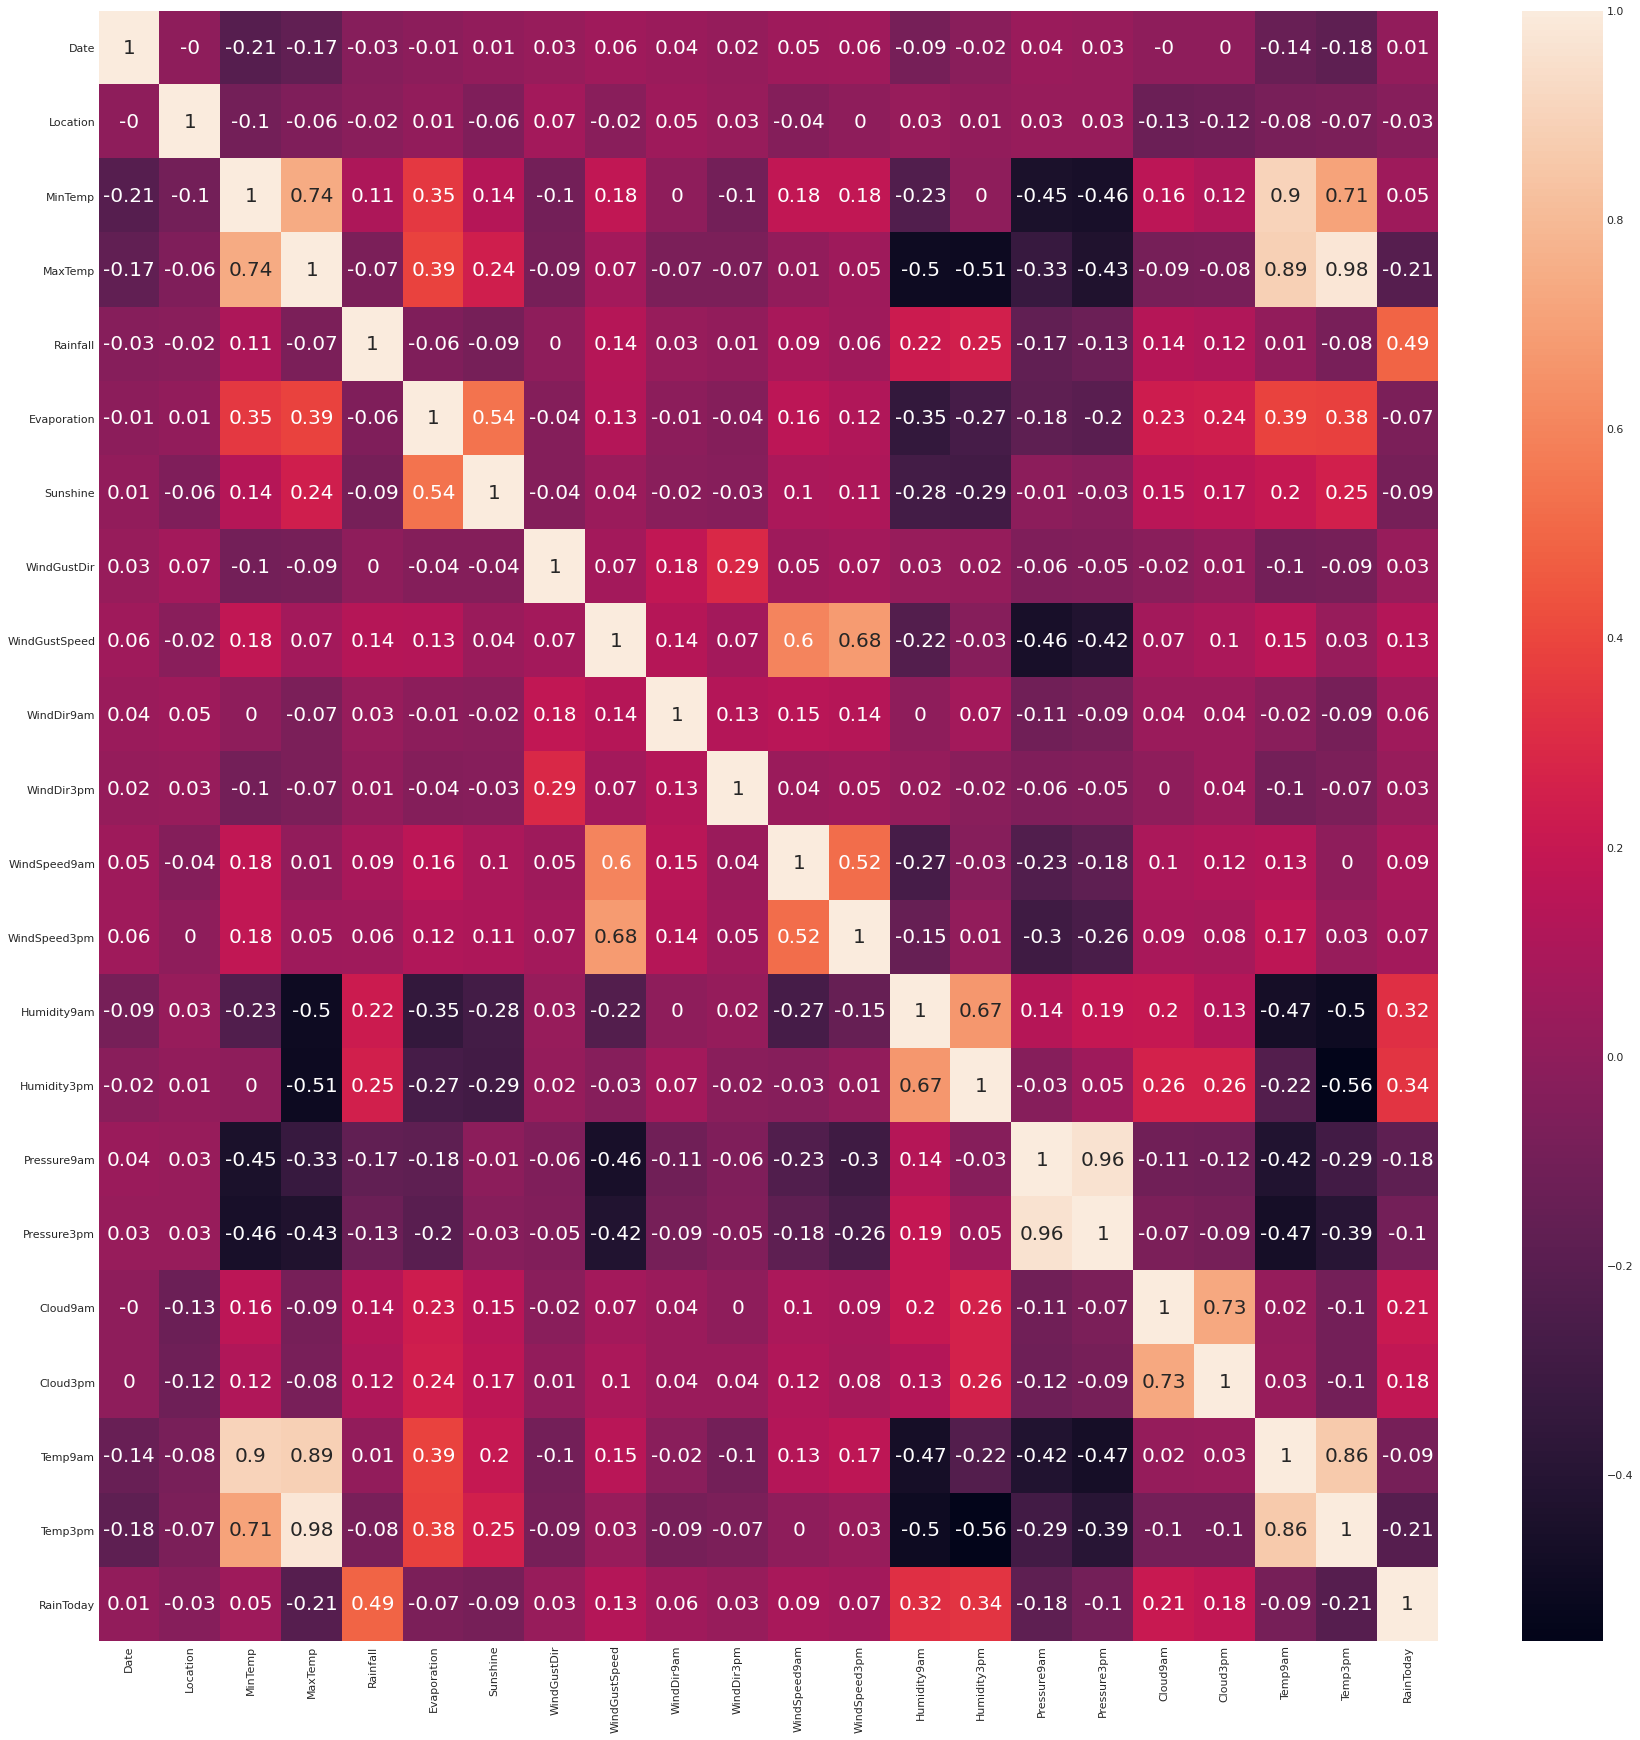

In [71]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = df_train.drop('RainTomorrow',axis=1).corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

Observando la matriz de correlación podemos mencionar:
-	Las temperaturas mínimas, máximas, 9am y 3pm están altamente correlacionadas.
-	La velocidad máxima del viento esta levemente correlacionada con la velocidad a las 9am y 3pm.
-	Las humedades a las 9am y 3pm están levemente correlacionadas.
-	Las presiones 9am y 3pm están altamente correlacionadas.
-	Las nubosidades a las 9am y 3pm están correlacionadas.


## Identificar variables de mayor importancia

Como primer método proponemos aplicar información mutua. En este método se mide el coeficiente de infromación mutua entre las variables de entrada y la variable de salida y se selecciona aquellas con mayor dependencia.

In [107]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)

In [108]:
# Codificación date
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)

In [109]:
# Codificación Locacion
location_dict={k:i for i,k in enumerate(df_train['Location'].unique())}
df_train.loc[:, 'Location'] = df_train.loc[:, 'Location'].map(location_dict)

In [110]:
# Codificacion Dirección viento
windir_dict={k:i for i,k in enumerate(df_train.loc[-df_train['WindGustDir'].isna(),\
                                                   'WindGustDir'].unique())}
df_train.loc[:, 'WindGustDir'] = df_train.loc[:, 'WindGustDir'].map(windir_dict)
df_train.loc[:, 'WindDir9am'] = df_train.loc[:, 'WindDir9am'].map(windir_dict)
df_train.loc[:, 'WindDir3pm'] = df_train.loc[:, 'WindDir3pm'].map(windir_dict)

In [111]:
# Codificacion RainToday
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)

In [112]:
# Delete values where output is Nan
df_train=df_train[df_train['RainTomorrow'].notna()]

In [113]:
# Imputo valores
df_train.loc[df_train['Evaporation'].isna(),'Evaporation'] = -1
df_train.loc[df_train['Sunshine'].isna(),'Sunshine'] = -1
df_train.loc[df_train['Cloud9am'].isna(),'Cloud9am'] = -1
df_train.loc[df_train['Cloud3pm'].isna(),'Cloud3pm'] = -1
df_train.loc[df_train['RainToday'].isna(),'RainToday'] = -1
imputer = SimpleImputer()
df_x_train=imputer.fit_transform(df_train.drop('RainTomorrow',axis=1))

In [114]:
# Codificacion de la salida
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

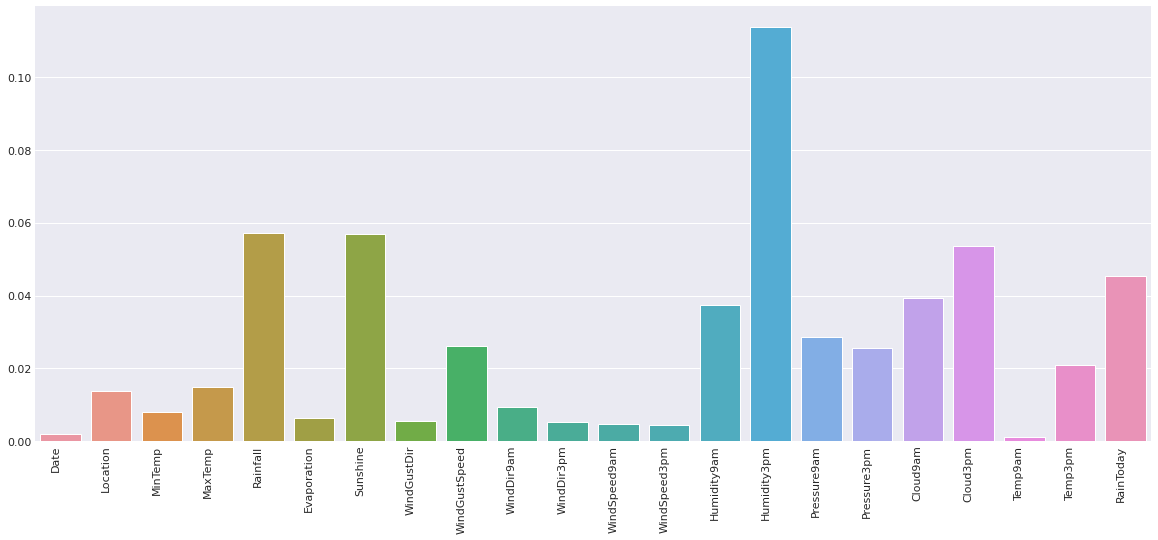

In [115]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_mutual_info(X_train, y_train,k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  return fs

fs = select_features_mutual_info(df_x_train, df_train['RainTomorrow'])
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in df_train.drop('RainTomorrow',axis=1).columns], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Utilizando este estadístico, concluimos que las variables de mayor interés son Humidity3pm, Cloud3pm, RainToday, Rainfall y Sunshine.

Como segundo método proponemos aplicar Lasso. Lasso es un método de regularización de regresión lineal cuya característica es que tiende a cero la componente de multiplicación de aquellos parámetros que no son importantes en la relación lineal

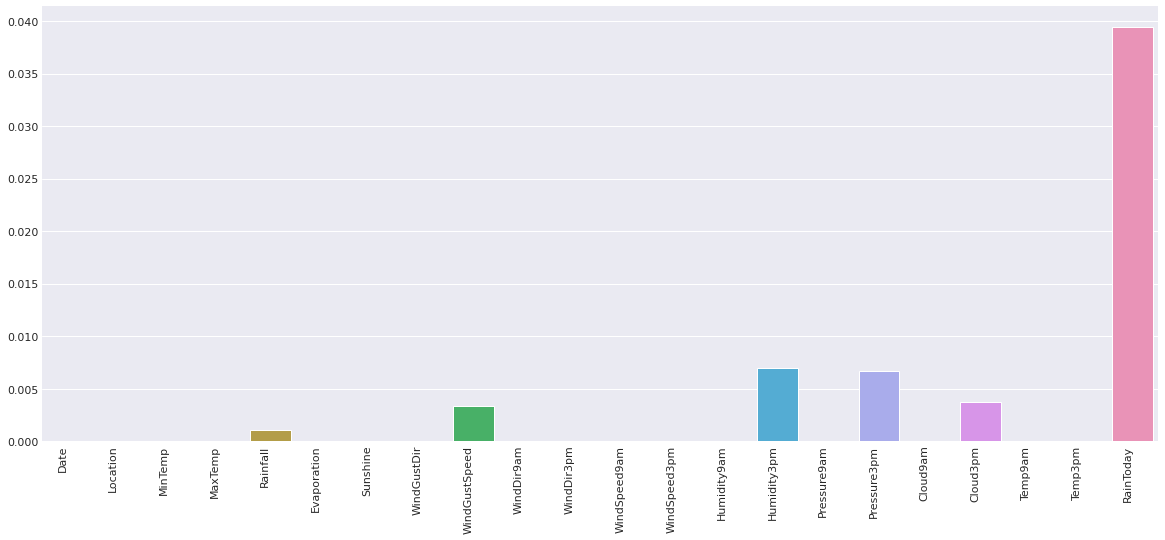

In [116]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1000)
lassoreg.fit(df_x_train, df_train['RainTomorrow'])
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in df_train.drop('RainTomorrow',axis=1).columns], \
                  y = np.abs(lassoreg.coef_), ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


Aplicando este método, observamos que las variables más importantes son RainToday, Humidity3pm, Pressure3pm, Cloud3pm, WindGustSpeed y Rainfall

-------------------------------------------------------------------------------------------------------
# 4- Entrenamiento de modelos

Dado que es un problema de clasificación binaria, proponemos como modelos la utilización de regresión logística y de Random Forest.

### Caso 1

Caso completo. 
codificación:
- Ordinal encoding para ciudad, direcciones de viento.
- Utilizar mes para la fecha.
- '0' para No y '1' para Yes en RainToday y RainTomorrow

Comparamos sin escalado y con escalado minmax y standard de los features

In [165]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)
# Caso completo
df_train=df_train[-df_train.isna().any(axis=1)]

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)
df_valid=df_valid[-df_valid.isna().any(axis=1)]

numeric_features = ['Date','MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine', 'WindGustSpeed',\
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am',\
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

categorical_transformer1 = Pipeline(steps=[
    ('encoder', OrdinalEncoder())])

numeric_transformer2 = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer2 = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', MinMaxScaler())])

numeric_transformer3 = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer3 = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', categorical_transformer1, categorical_features),
        ('bin', 'passthrough', binary_features)])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer2, categorical_features),
        ('bin', 'passthrough', binary_features)])

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, numeric_features),
        ('cat', categorical_transformer3, categorical_features),
        ('bin', 'passthrough', binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor1),
                       ('classifier', LogisticRegression(max_iter=1000,random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor1),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

model3 = Pipeline(steps=[('preprocessor', preprocessor2),
                       ('classifier', LogisticRegression(max_iter=1000,random_state=5))])

model4 = Pipeline(steps=[('preprocessor', preprocessor2),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

model5 = Pipeline(steps=[('preprocessor', preprocessor3),
                       ('classifier', LogisticRegression(max_iter=1000,random_state=5))])

model6 = Pipeline(steps=[('preprocessor', preprocessor3),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression no scale",model1) ,
    ("LogistiRegression minmax scale",model3) ,
    ("LogistiRegression standard scale",model5) ,
    ("RandomForest no scale", model2),
    ("RandomForest minmax scale", model4),
    ("RandomForest standard scale", model6),
]

results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
        
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["Valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])
    
df_results = pd.DataFrame(results).T
df_results

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train,valid
LogistiRegression no scale,0.881611,0.881279
LogistiRegression minmax scale,0.884779,0.884630
LogistiRegression standard scale,0.885483,0.884816
RandomForest no scale,1.000000,0.900085
RandomForest minmax scale,1.000000,0.900073
RandomForest standard scale,1.000000,0.899984


Observamos una buena performance en general de los modelos. Comentarios:
- A pesar que la performance es buena, estamos descartanto el 60% del dataset por no tratar los NaN
- RandomForest tiende a hacer overfitting en el entranmiento pero generaliza bien igualmente.
- En regresión lineal observamos un buen equilibrio entre la performance de train y valid.
- Regresión lineal tiene peor performance como ya intuíamos por ser modelo lineal, pero mucho mejor de lo esperado.
- En regresión lineal el escalado mejora la performance lo cual era esperable, mientras que en RandomForest practicamente no hay diferencia.

### Caso 2

Codificación:
- Ordinal encoding para ciudad, direcciones de viento.
- Utilizar mes para la fecha.
- '0' para No y '1' para Yes en RainToday y RainTomorrow
- Imputamos con mediana valores numéricos faltantes.
- Imputamos con categoría unknown valores categóricos faltantes.
-  Escalado standard

In [166]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features = ['Date','MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine', 'WindGustSpeed',\
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am',\
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["Valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])
    
df_results = pd.DataFrame(results).T
df_results

,Train,Valid
LogistiRegression,0.862259,0.861019
RandomForest,1.000000,0.888134


Conclusiones de este caso:
- La performance disminuyó. Esto es coherente con el hecho de haber imputado con mediana features con alta cantidad de NA, lo cual distorsiona enormemente las distribuciones.

### Caso 3
 
codificación:
- Utilizar mes para la fecha.
- '0' para No y '1' para Yes en RainToday y RainTomorrow
- Imputamos con mediana valores numéricos faltantes en features con baja tasa de NA.
- Imputamos con -1 en features con alta tasa de NA.
- Imputamos con categoría unknown valores categóricos faltantes.
- Label encoding para ciudad, direcciones de viento.
-  Escalado standard

In [167]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',\
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Temp9am','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine','Pressure9am',\
                            'Pressure3pm', 'Cloud9am', 'Cloud3pm']

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1)),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["Valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])
    
df_results = pd.DataFrame(results).T
df_results

,Train,valid
LogistiRegression,0.846967,0.845916
RandomForest,1.000000,0.888909


Conclusiones:
- Para RandomForest no hubo gran cambio.
- Para Regresión Logistica hubo una baja apreciable de la performance. Esto se debe seguramente a la distorsión que genera la imputación por valor arbitrario en la distribución de algún feature importante para la regresión.

### Caso 4
 
Codificación idem anterior pero agregamos columna con categoría faltante para valores numéricos.

In [168]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',\
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Temp9am','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine','Pressure9am',\
                            'Pressure3pm', 'Cloud9am', 'Cloud3pm']

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["Valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])
    
df_results = pd.DataFrame(results).T
df_results

,Train,Valid
LogistiRegression,0.86326,0.863053
RandomForest,1.00000,0.889042


Conclusión:

Dato que recuperamos la performance del modelo de regresión, notamos que la información de presencia de NaN es importante para algunos features en la relación lineal.

### Caso 5

Probamos one hot encoder con las variables de baja cardinalidad.

In [169]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',\
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Temp9am','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine','Pressure9am',\
                            'Pressure3pm', 'Cloud9am', 'Cloud3pm']

categorical_features_high_card = ['Location']
categorical_features_low_card = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

categorical_transformer_high_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder())])

categorical_transformer_low_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OneHotEncoder())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat_high_card', categorical_transformer_high_card, categorical_features_high_card),
        ('cat_low_card', categorical_transformer_low_card, categorical_features_low_card),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])

df_results = pd.DataFrame(results).T
df_results

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train,valid
LogistiRegression,0.866419,0.866271
RandomForest,1.000000,0.887640


Conclusiones:
- Mejora la performance del modelo lineal lo cual era esperable ya que One Hot Encoding preserva mejor la linealidad que asignar enteros al azar a las variables categóricas.
- Un punto interesante es que disminuye la performance de RandomForest en valid. Se presupone que esto es por un aumento del overfitting.

### Caso 6

Probamos mean encoding en Location

In [170]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)
# Codificación Ciudad
aux= df_train[df_train['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].\
                          count() / df_train.groupby('Location')['RainTomorrow'].count()
location_dict= {a: b for a, b in zip(aux.index,aux.values)}
df_train.loc[:, 'Location'] = df_train.loc[:, 'Location'].map(location_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)
df_valid.loc[:, 'Location'] = df_valid.loc[:, 'Location'].map(location_dict)


numeric_features_low_na = ['Date','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',\
                           'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Temp9am','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine','Pressure9am',\
                            'Pressure3pm', 'Cloud9am', 'Cloud3pm']

categorical_features_low_card = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

categorical_transformer_low_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OneHotEncoder())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat_low_card', categorical_transformer_low_card, categorical_features_low_card),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])

df_results = pd.DataFrame(results).T
df_results

,Train,valid
LogistiRegression,0.8665,0.866313
RandomForest,1.0000,0.886226


Conclusiones:

- Mejora la performance del modelo lineal pero muy levemente.
- Nuevamente disminuye la performance de RandomForest en valid. Se presupone que esto es por un aumento del overfitting.

### Caso 7

Partimos del caso 5 y descartamos los features altamente correlacionados:

- Descartamos Temp9am, MinTemp y MaxTemp. Utilizamos Temp3pm que tiene mayor relación con la salida.
- Descarto  humedad, presión y cloud 9am y utilizo los valores 3pm por tener mayor correlación con la salida.


In [171]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Date', 'Rainfall', 'WindGustSpeed','WindSpeed9am',\
                           'WindSpeed3pm', 'Humidity3pm','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine', 'Pressure3pm', 'Cloud3pm']

categorical_features_high_card = ['Location']
categorical_features_low_card = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

categorical_transformer_high_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder())])

categorical_transformer_low_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OneHotEncoder())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat_high_card', categorical_transformer_high_card, categorical_features_high_card),
        ('cat_low_card', categorical_transformer_low_card, categorical_features_low_card),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])

df_results = pd.DataFrame(results).T
df_results

,Train,valid
LogistiRegression,0.866206,0.86596
RandomForest,0.999922,0.88529


Notamos que como era de esperarse prácticamente no se pierde performance por eliminar las variables correlacionadas.

### Caso 8

Partimos del caso 5 y utilizamos solo los features mas importantes identificados con el coeficiente de información mutua.


In [173]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Rainfall', 'Humidity3pm']

numeric_features_high_na = ['Sunshine', 'Cloud3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])


binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])

df_results = pd.DataFrame(results).T
df_results

,Train,valid
LogistiRegression,0.825632,0.826804
RandomForest,0.956898,0.792316


Conclusiones:
- La performance en regresión logística disminuyo pero en un valor relativamente razonable y esperado.
- La performance de RandomForest disminuyó mucho mas de lo esperado. Evidentemente aún hay información valiosa en las features eliminadas.

### Caso 9

Partimos del caso 5 y utilizamos solo los features mas importantes identificados con Lasso.


In [175]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_valid=pd.concat([x_valid,pd.DataFrame(y_valid)],axis=1)
df_valid=df_valid[df_valid['RainTomorrow'].notna()]
df_valid['Date']=df_valid['Date'].astype(str).str[5:7].astype(int)
df_valid.loc[:, 'RainToday'] = df_valid.loc[:, 'RainToday'].map(raintoday_dict)
df_valid.loc[:, 'RainTomorrow'] = df_valid.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Rainfall', 'WindGustSpeed', 'Humidity3pm']

numeric_features_high_na = ['Pressure3pm', 'Cloud3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_valid = model.predict_proba(df_valid.drop('RainTomorrow',axis=1))
    
    results[model_name]["Train"] = roc_auc_score(df_train['RainTomorrow'], pred_train[:,1])
    results[model_name]["valid"] =non_red_score_valid = roc_auc_score(df_valid['RainTomorrow'], \
                                                                             pred_valid[:,1])

df_results = pd.DataFrame(results).T
df_results

,Train,valid
LogistiRegression,0.854641,0.854177
RandomForest,0.999039,0.836717


En este caso tenemos mejor performance que al seleccionar variables por información mutua. 

Esto nos indica que el límite de variables basado en información mutua estipulado anteriormente fue demasiado optimista, y también que los coeficientes de correlación no siempre nos indican lo que "el modelo necesita".

### Prueba en test

Finalmente utilizamos el caso 5, entrenamos y verificamos los resultados en el set de test

In [178]:
df_train=pd.concat([x_train,pd.DataFrame(y_train)],axis=1)
df_train=df_train[df_train['RainTomorrow'].notna()]
df_train['Date']=df_train['Date'].astype(str).str[5:7].astype(int)
raintoday_dict={'No':0,'Yes':1}
df_train.loc[:, 'RainToday'] = df_train.loc[:, 'RainToday'].map(raintoday_dict)
df_train.loc[:, 'RainTomorrow'] = df_train.loc[:, 'RainTomorrow'].map(raintoday_dict)

df_test=pd.concat([x_test,pd.DataFrame(y_test)],axis=1)
df_test=df_test[df_test['RainTomorrow'].notna()]
df_test['Date']=df_test['Date'].astype(str).str[5:7].astype(int)
df_test.loc[:, 'RainToday'] = df_test.loc[:, 'RainToday'].map(raintoday_dict)
df_test.loc[:, 'RainTomorrow'] = df_test.loc[:, 'RainTomorrow'].map(raintoday_dict)


numeric_features_low_na = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',\
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Temp9am','Temp3pm']

numeric_features_high_na = ['Evaporation','Sunshine','Pressure9am',\
                            'Pressure3pm', 'Cloud9am', 'Cloud3pm']

categorical_features_high_card = ['Location']
categorical_features_low_card = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

binary_features = [ 'RainToday' ]

numeric_transformer_low_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())])

numeric_transformer_high_na = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1, add_indicator=True)),
    ('scaler', StandardScaler())])

categorical_transformer_high_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OrdinalEncoder())])

categorical_transformer_low_card = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('encoder', OneHotEncoder())])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_low_na', numeric_transformer_low_na, numeric_features_low_na),
        ('num_high_na', numeric_transformer_high_na, numeric_features_high_na),
        ('cat_high_card', categorical_transformer_high_card, categorical_features_high_card),
        ('cat_low_card', categorical_transformer_low_card, categorical_features_low_card),
        ('bin', binary_transformer, binary_features)])

model1 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=5))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(n_estimators=200, random_state=5))])

models = [
    ("LogistiRegression",model1) ,
    ("RandomForest", model2)
]


results = {}
for m in models:
    model_name = m[0]
    results[model_name] = {}
    model = clone(m[1])
    
    model.fit(df_train.drop('RainTomorrow',axis=1), df_train['RainTomorrow'])
    pred_train = model.predict_proba(df_train.drop('RainTomorrow',axis=1))
    pred_test = model.predict_proba(df_test.drop('RainTomorrow',axis=1))
    
    results[model_name]["test"] =non_red_score_test = roc_auc_score(df_test['RainTomorrow'], \
                                                                             pred_test[:,1])

df_results = pd.DataFrame(results).T
df_results

C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,test
LogistiRegression,0.868166
RandomForest,0.890142
